# Exploring Relationships

## This script contains the following points:
### 01. Importing libraries
### 02. Importing Data
### 03. Merge and Export Data
### 04. Exploring Relationships
#### Correlations
#### Scatterplots
#### Pair Plots
#### Categorical Plots

## 01. Importing libraries

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [13]:
# Check the version of matplotlib, If it shows version 3.1.1, there will be likely some problems with the way the heatmap appears.
matplotlib.__version__

'3.7.1'

In [14]:
# This option ensures the charts that will be create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

## 02. Importing Data

In [16]:
# Define path
%run env_1.ipynb
path = path_1

In [17]:
#Import dataset 1

df_pipelines = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'pipelines_clean.xlsx'), index_col = False)

In [18]:
#Import dataset 2

df_failures = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'failures_clean.xlsx'), index_col = False)

## 03. Merge Data

#### Hint: Make sure the key columns are the same data type!

In [19]:
df_pipelines['id_pipeline'].dtype

dtype('int64')

In [20]:
df_failures['id_pipeline'].dtype

dtype('int64')

#### Observation:  The key column 'id_pipeline' is the same data type in the both dataframes.

In [21]:
df_pipelines.shape

(78951, 12)

In [22]:
df_failures.shape

(2327, 5)

In [23]:
df_pipelines.head(5)

,Unnamed: 0,id_pipeline,year_installation,pipe_age_2013,length,diameter,material,soil_consistency,soil_aggressivity,groundwater,traffic_load,stray_electricity
0,0,2061749,NaN,NaN,0.177445,600.0,4,4,3,1.0,1,4
1,1,2038858,NaN,NaN,0.143000,600.0,4,4,3,1.0,1,3
2,2,2038836,NaN,NaN,0.143000,600.0,4,4,3,1.0,1,3
3,3,2061410,NaN,NaN,0.185747,600.0,4,4,3,1.0,1,4
4,4,2038844,NaN,NaN,0.143000,600.0,4,4,3,1.0,1,3


In [24]:
df_failures.head(5)

,Unnamed: 0,id_failure,id_pipeline,failure_reported_on,cause_of_damage
0,0,1196,2067243,1981-11-14,NaN
1,1,1443,2074816,1998-11-12,NaN
2,2,83500002/15,2068165,2006-07-27,NaN
3,3,1433,2062991,1998-01-13,NaN
4,4,1990,2056069,2004-08-10,NaN


In [25]:
# Drop column Unnamed: 0 from df_pipelines
df_pipelines = df_pipelines.drop(columns = ['Unnamed: 0'])

In [26]:
df_pipelines.shape

(78951, 11)

In [27]:
# Drop column Unnamed: 0 from df_failures
df_failures = df_failures.drop(columns = ['Unnamed: 0'])

In [28]:
df_failures.shape

(2327, 4)

### A. Dataset that includes rows for pipelines where failures have occurred. 
Note:This dataset contains all rows from df_pipelines that have a matching id_pipeline in both data frames (df_pipelines and df_failures).

In [29]:
# Combine the failures dataset with the data from pipelines set by merging df_failures and df_pipelines using id_pipeline as a key, performs an inner merge, including only matching rows.
df_pipes_failures_merged = df_pipelines.merge(df_failures, on = 'id_pipeline')

In [30]:
df_pipes_failures_merged.head(5)

,id_pipeline,year_installation,pipe_age_2013,length,diameter,material,soil_consistency,soil_aggressivity,groundwater,traffic_load,stray_electricity,id_failure,failure_reported_on,cause_of_damage
0,1458131,1915.0,98.0,96.092,500.0,2,0,4,1.0,2,1,1213,1947-09-05,NaN
1,1864802,1899.0,114.0,69.417,400.0,2,3,3,1.0,1,1,1472,1987-10-13,NaN
2,1879790,1970.0,43.0,885.750,400.0,3,4,1,3.0,1,4,82300002/1563,2012-12-03,3.0
3,1792585,1987.0,26.0,12.789,400.0,3,5,3,1.0,3,3,1899,1987-10-05,NaN
4,1830979,1967.0,46.0,129.598,400.0,3,0,4,1.0,1,3,1513,1994-09-30,NaN


In [31]:
df_pipes_failures_merged.shape

(2295, 14)

In [32]:
# Use the indicator argument to check whether there was a full match between the two dataframes
pipes_failures_merged_indicator = df_pipelines.merge(df_failures, on = 'id_pipeline', indicator='merge_indicator')

In [33]:
pipes_failures_merged_indicator['merge_indicator'].value_counts()

both          2295
left_only        0
right_only       0
Name: merge_indicator, dtype: int64

In [34]:
# Merge df_ords and df_ords_prior using order_id as a key & the argument how = 'outer', to double-check the full match 
df_merged_large_test= df_pipelines.merge(df_failures, on = 'id_pipeline', indicator = 'merge_indicator_1', how = 'outer')

In [35]:
# Use the indicator argument to check whether there was a full match between the two dataframes
df_merged_large_test['merge_indicator_1'].value_counts()

left_only     77051
both           2295
right_only       32
Name: merge_indicator_1, dtype: int64

#### Observation: After using this method to double-check the merge, we can confirm that 'df_pipes_failures_merged' contains  only data that have a full merge from the both data frames (df_pipelines and df_failures).

### B. Dataset that includes rows for all pipelines.
Note: It that  all rows that have pipeline values in df_pipelines, and it will include additional information from df_failures for those rows where a match is found based on the id_pipeline column

In [36]:
# Left merge to include all rows from df_pipelines and only matching rows from df_failures
df_pipes_failures_merged_all = df_pipelines.merge(df_failures, on='id_pipeline', how='left')

In [37]:
df_pipes_failures_merged_all.head(5)

,id_pipeline,year_installation,pipe_age_2013,length,diameter,material,soil_consistency,soil_aggressivity,groundwater,traffic_load,stray_electricity,id_failure,failure_reported_on,cause_of_damage
0,2061749,NaN,NaN,0.177445,600.0,4,4,3,1.0,1,4,NaN,NaT,NaN
1,2038858,NaN,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,NaT,NaN
2,2038836,NaN,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,NaT,NaN
3,2061410,NaN,NaN,0.185747,600.0,4,4,3,1.0,1,4,NaN,NaT,NaN
4,2038844,NaN,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,NaT,NaN


In [38]:
df_pipes_failures_merged_all.shape

(79346, 14)

#### Observation: After using the above method to double-check the merge, we can confirm that 'df_pipes_failures_merged_all' contains all data from the df_pipelines and the matching values from df_failures.

In [39]:
# Create the new column 'failure_occurred_on_pipe'
df_pipes_failures_merged_all['failure_occurred_on_pipe'] = np.where(df_pipes_failures_merged_all['id_failure'].notnull(), 1, 0)

In [40]:
# Export the merged dataset I
df_pipes_failures_merged.to_excel(os.path.join(path, '02 Data','Prepared Data', 'pipes_failures_merged.xlsx'))

In [41]:
# Export the merged dataset II
df_pipes_failures_merged_all.to_excel(os.path.join(path, '02 Data','Prepared Data', 'pipes_failures_merged_all.xlsx'))

## 04. Exploring Relationships

## Question to explore: 
### 1.What factors have the most impact on the occurrence of the pipe failures?
### 2. Which risk factor is the dominant one?
### 3. Which pipe material is the most apron to failure and under which conditions?
### 4. Can we support the rehabilitation planning of the water supply network based on the available data?


### Pick out variables from the data set 'df_pipes_failures_merged_all' suitable for the exploratory visual analysis-Explore the structural factors ('pipe_age_2013', 'length', 'diameter', 'material') and environmental factors ('soil_consistency', 'soil_aggressivity', 'groundwater', 'traffic_load', 'stray_electricity') with the occurrence of pipe failures (cause_of_damage', 'failure_occurred_on_pipe)

In [42]:
# Discard 'IDs' and 'date' variables and  'pipe_age' variable as unnecessary for the further analysis  
df_pipes_failures = df_pipes_failures_merged_all.drop(columns=["id_pipeline", "year_installation", "id_failure",'failure_reported_on' ])

In [43]:
# Export the final df_pipes_failures dataset
df_pipes_failures.to_excel(os.path.join(path, '02 Data','Prepared Data', 'pipes_failures_final.xlsx'))

In [44]:
df_pipes_failures.columns

Index(['pipe_age_2013', 'length', 'diameter', 'material', 'soil_consistency',
       'soil_aggressivity', 'groundwater', 'traffic_load', 'stray_electricity',
       'cause_of_damage', 'failure_occurred_on_pipe'],
      dtype='object')

In [45]:
# Get the data types of all columns
column_data_types = df_pipes_failures.dtypes

# Print the result
print(column_data_types)

pipe_age_2013               float64
length                      float64
diameter                    float64
material                      int64
soil_consistency              int64
soil_aggressivity             int64
groundwater                 float64
traffic_load                  int64
stray_electricity             int64
cause_of_damage             float64
failure_occurred_on_pipe      int32
dtype: object


In [46]:
# Get the data types of all columns
column_data_types = df_pipes_failures.dtypes

# Print the result
print(column_data_types)

pipe_age_2013               float64
length                      float64
diameter                    float64
material                      int64
soil_consistency              int64
soil_aggressivity             int64
groundwater                 float64
traffic_load                  int64
stray_electricity             int64
cause_of_damage             float64
failure_occurred_on_pipe      int32
dtype: object


### 4.1 Correlations

In [47]:
# Create a correlation matrix using pandas
df_pipes_failures.corr()

,pipe_age_2013,length,diameter,material,soil_consistency,soil_aggressivity,groundwater,traffic_load,stray_electricity,cause_of_damage,failure_occurred_on_pipe
pipe_age_2013,1.000000,0.083222,0.093556,-0.677079,-0.060159,0.086930,0.031213,-0.026669,0.006521,-0.046137,0.115286
length,0.083222,1.000000,0.205656,-0.072866,0.053520,-0.023497,0.017992,-0.079629,0.049081,-0.084673,0.140077
diameter,0.093556,0.205656,1.000000,-0.295767,-0.013084,0.097050,0.047674,-0.174153,0.053146,0.021982,0.046683
material,-0.677079,-0.072866,-0.295767,1.000000,0.097327,-0.043895,-0.034980,0.107438,-0.021114,0.000839,-0.060470
soil_consistency,-0.060159,0.053520,-0.013084,0.097327,1.000000,0.063193,-0.036690,-0.031305,0.055398,0.005548,0.003591
soil_aggressivity,0.086930,-0.023497,0.097050,-0.043895,0.063193,1.000000,0.007343,0.145771,-0.149402,0.030360,0.000225
groundwater,0.031213,0.017992,0.047674,-0.034980,-0.036690,0.007343,1.000000,0.090102,-0.046476,-0.017913,0.006800
traffic_load,-0.026669,-0.079629,-0.174153,0.107438,-0.031305,0.145771,0.090102,1.000000,-0.368865,-0.024219,-0.019454
stray_electricity,0.006521,0.049081,0.053146,-0.021114,0.055398,-0.149402,-0.046476,-0.368865,1.000000,-0.016030,0.020064
cause_of_damage,-0.046137,-0.084673,0.021982,0.000839,0.005548,0.030360,-0.017913,-0.024219,-0.016030,1.000000,NaN


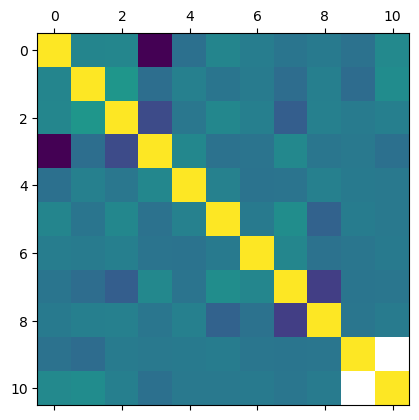

In [48]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_pipes_failures.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

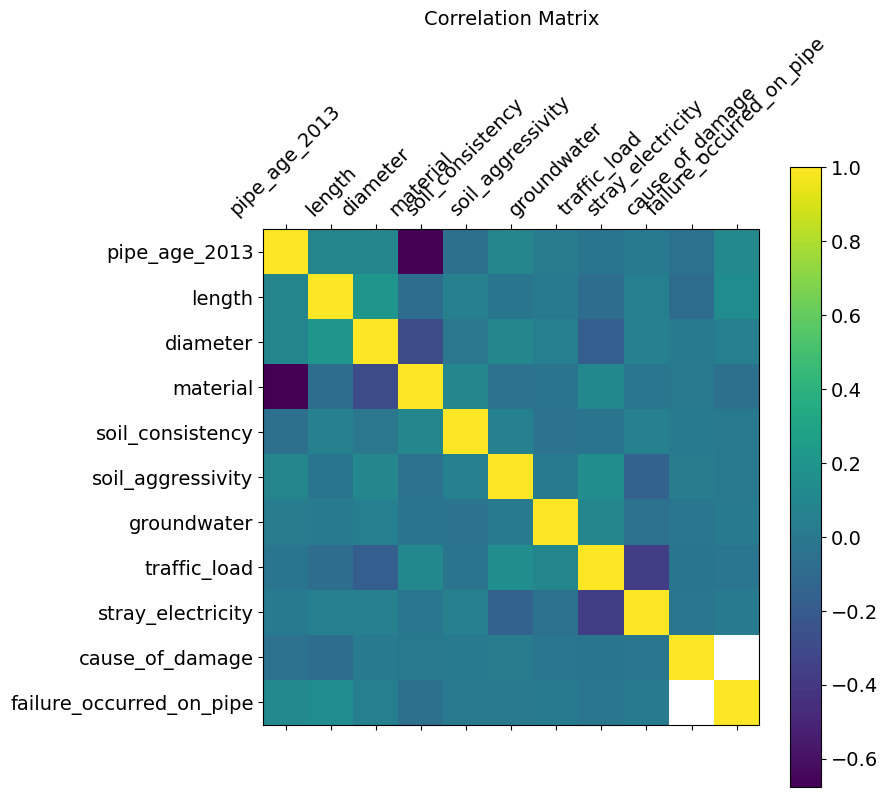

In [49]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_pipes_failures.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_pipes_failures.shape[1]), df_pipes_failures.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_pipes_failures.shape[1]), df_pipes_failures.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

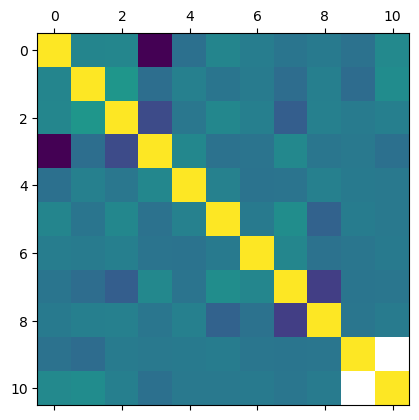

In [50]:
# Save figure
plt.matshow(df_pipes_failures.corr())
plt.savefig("pipes_failure_corr_out.png") 

# This will save the image in the working directory. 

In [51]:
# check current directory
cwd = os.getcwd()
cwd

'C:\\Users\\Sanja\\Documents\\11-2023 Water Loss Project\\03 Scripts'

#### Create a correlation heatmap using seaborn:

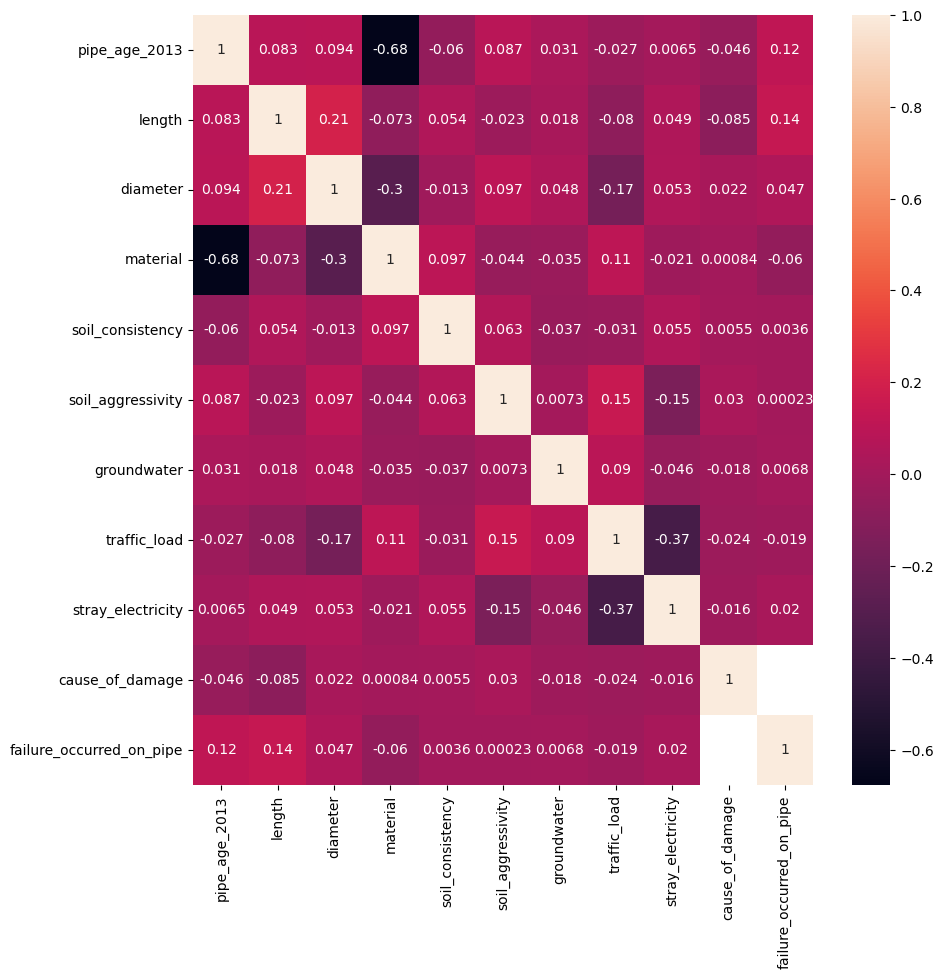

In [52]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_pipes_failures.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
# Save the heatmap as an image file (e.g., PNG)
plt.savefig("correlation_heatmap.png")

### Calculating Spearman's Rank Correlation Coefficient for assessing the correlation between  categorical variables by examining their ranked values

In [53]:
# Create a new DataFrame with dummy variables
df_pipes_failures_dummies = pd.get_dummies(df_pipes_failures, columns=['material', 'soil_consistency', 'soil_aggressivity', 'groundwater', 'traffic_load', 'stray_electricity', 'cause_of_damage'])

# Display the updated DataFrame
print(df_pipes_failures_dummies.head())

   pipe_age_2013    length  diameter  failure_occurred_on_pipe  material_0  \
0            NaN  0.177445     600.0                         0           0   
1            NaN  0.143000     600.0                         0           0   
2            NaN  0.143000     600.0                         0           0   
3            NaN  0.185747     600.0                         0           0   
4            NaN  0.143000     600.0                         0           0   

   material_1  material_2  material_3  material_4  material_5  ...  \
0           0           0           0           1           0  ...   
1           0           0           0           1           0  ...   
2           0           0           0           1           0  ...   
3           0           0           0           1           0  ...   
4           0           0           0           1           0  ...   

   stray_electricity_2  stray_electricity_3  stray_electricity_4  \
0                    0                    

#### Create new subsets for assessing the correlation between categorical variables by examining their ranked values¶

In [54]:
df_pipes_failures_dummies.columns

Index(['pipe_age_2013', 'length', 'diameter', 'failure_occurred_on_pipe',
       'material_0', 'material_1', 'material_2', 'material_3', 'material_4',
       'material_5', 'material_8', 'material_10', 'soil_consistency_0',
       'soil_consistency_1', 'soil_consistency_2', 'soil_consistency_3',
       'soil_consistency_4', 'soil_consistency_5', 'soil_aggressivity_0',
       'soil_aggressivity_1', 'soil_aggressivity_2', 'soil_aggressivity_3',
       'soil_aggressivity_4', 'groundwater_1.0', 'groundwater_2.0',
       'groundwater_3.0', 'traffic_load_1', 'traffic_load_2', 'traffic_load_3',
       'traffic_load_4', 'traffic_load_5', 'stray_electricity_1',
       'stray_electricity_2', 'stray_electricity_3', 'stray_electricity_4',
       'cause_of_damage_0.0', 'cause_of_damage_1.0', 'cause_of_damage_2.0',
       'cause_of_damage_3.0', 'cause_of_damage_4.0', 'cause_of_damage_6.0',
       'cause_of_damage_7.0'],
      dtype='object')

In [55]:
# List of columns to include in the subset 1
selected_columns = ['material_1', 'material_2', 'material_3', 'material_4', 'material_5',
                    'material_8', 'material_10', 'failure_occurred_on_pipe', 'cause_of_damage_1.0', 'cause_of_damage_2.0',
       'cause_of_damage_3.0']

# Create a new DataFrame subset
df_subset_1 = df_pipes_failures_dummies[selected_columns]

# Display the new subset
print(df_subset_1.head())

   material_1  material_2  material_3  material_4  material_5  material_8  \
0           0           0           0           1           0           0   
1           0           0           0           1           0           0   
2           0           0           0           1           0           0   
3           0           0           0           1           0           0   
4           0           0           0           1           0           0   

   material_10  failure_occurred_on_pipe  cause_of_damage_1.0  \
0            0                         0                    0   
1            0                         0                    0   
2            0                         0                    0   
3            0                         0                    0   
4            0                         0                    0   

   cause_of_damage_2.0  cause_of_damage_3.0  
0                    0                    0  
1                    0                    0  
2       

In [56]:
def display_correlation(df):
    r = df_subset_1.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [57]:
def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None
                            )      

    r = display_correlation(df)
    rho = df.corr(method="pearson")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="yellow")
    g.map_lower(sns.scatterplot,color="magenta")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    plt.show()  

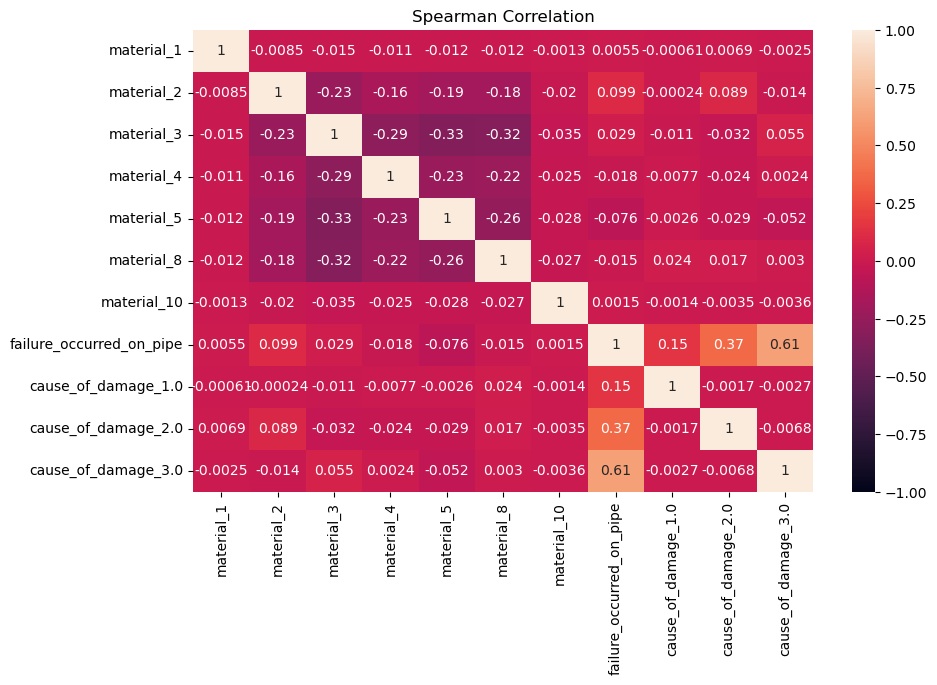

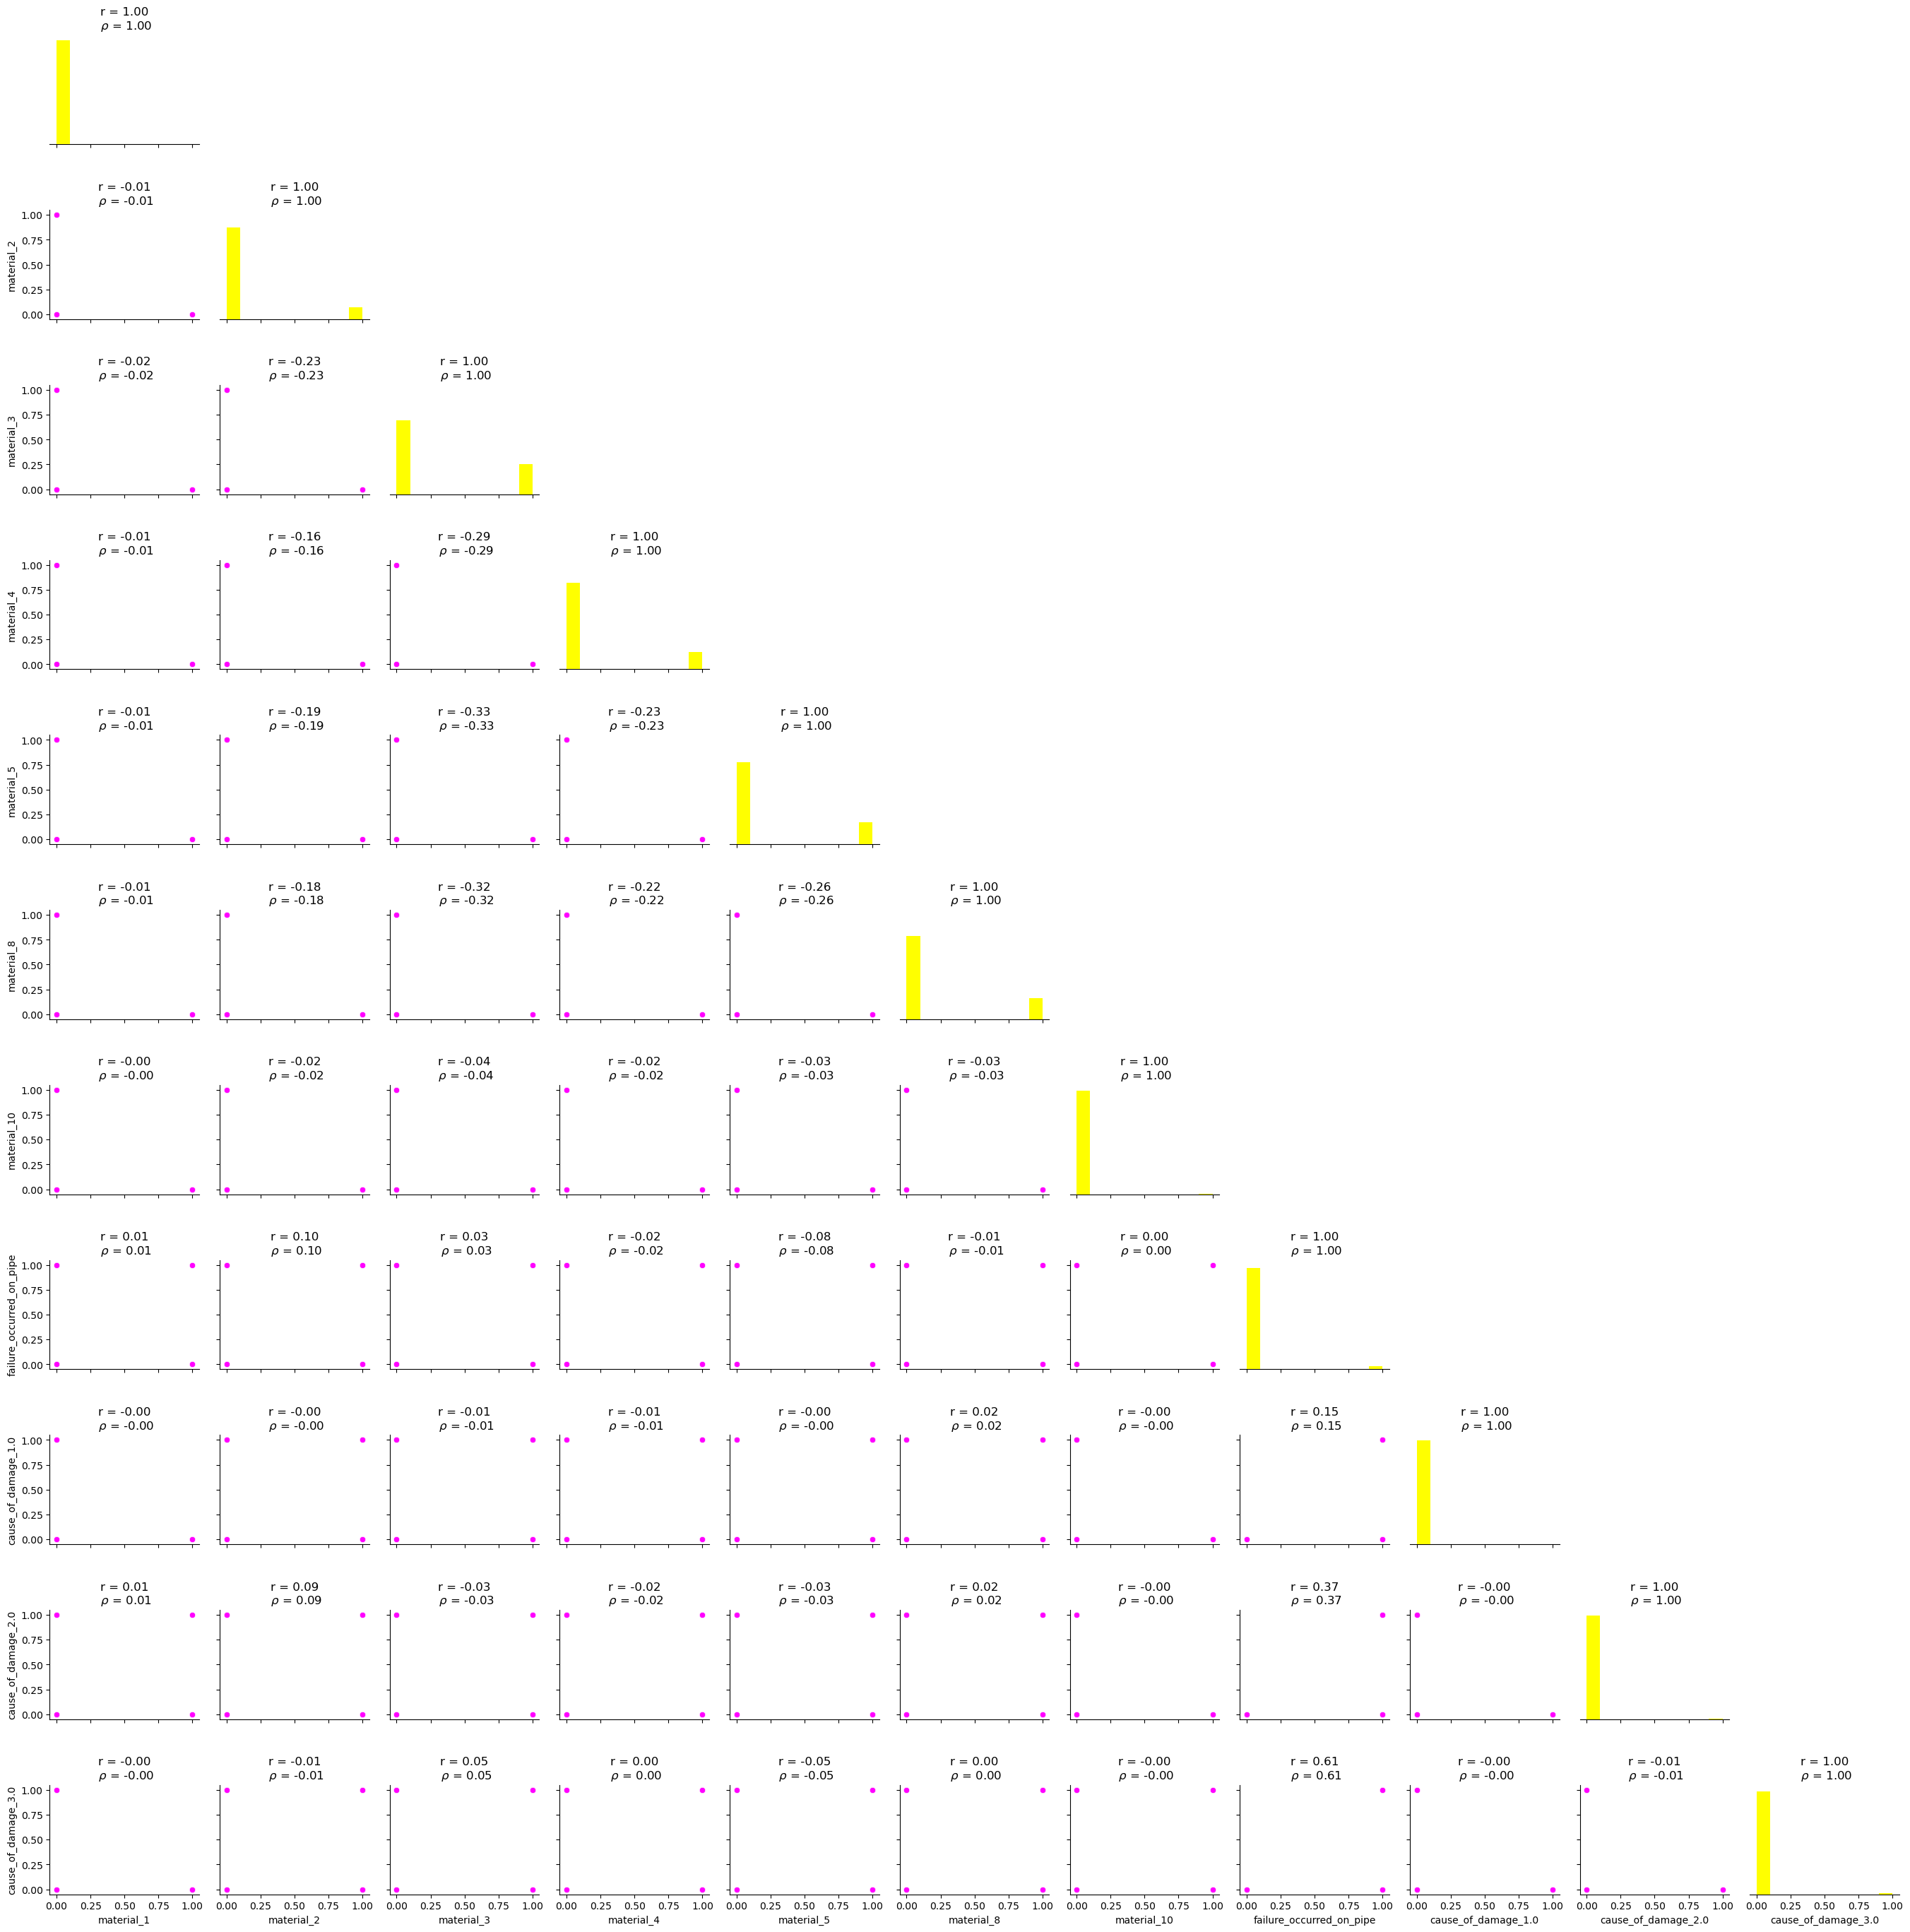

In [58]:
display_corr_pairs(df_subset_1)

#### Observation: We haven't identified a  correlation between the type of pipe material and the cause of failure or the failure occurrence.

In [59]:
# List of columns to include in the subset 2
selected_columns = ['soil_consistency_1',
       'soil_consistency_2', 'soil_consistency_3', 'soil_consistency_4',
       'soil_consistency_5', 'failure_occurred_on_pipe', 'cause_of_damage_1.0', 'cause_of_damage_2.0',
       'cause_of_damage_3.0']

# Create a new DataFrame subset
df_subset_2 = df_pipes_failures_dummies[selected_columns]

# Display the new subset
print(df_subset_2.head())

   soil_consistency_1  soil_consistency_2  soil_consistency_3  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   soil_consistency_4  soil_consistency_5  failure_occurred_on_pipe  \
0                   1                   0                         0   
1                   1                   0                         0   
2                   1                   0                         0   
3                   1                   0                         0   
4                   1                   0                         0   

   cause_of_damage_1.0  cause_of_damage_2.0  cause_of_damage_3.0  
0                    0                    0                    0  
1                    0                    0     

In [60]:
def display_correlation(df):
    r = df_subset_2.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [61]:
def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None
                            )      

    r = display_correlation(df)
    rho = df.corr(method="pearson")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="yellow")
    g.map_lower(sns.scatterplot,color="magenta")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    plt.show()

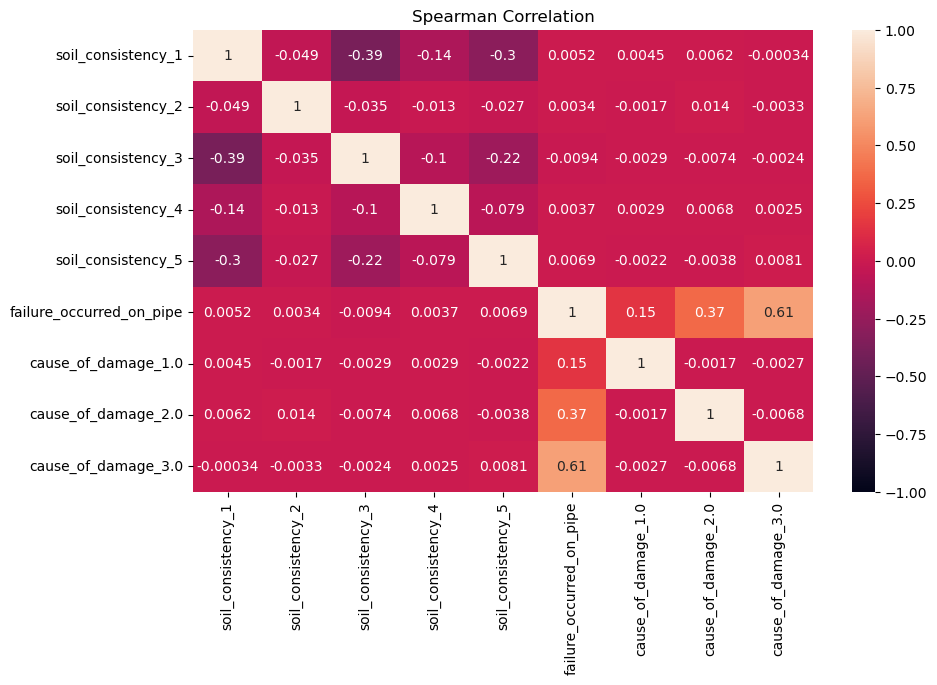

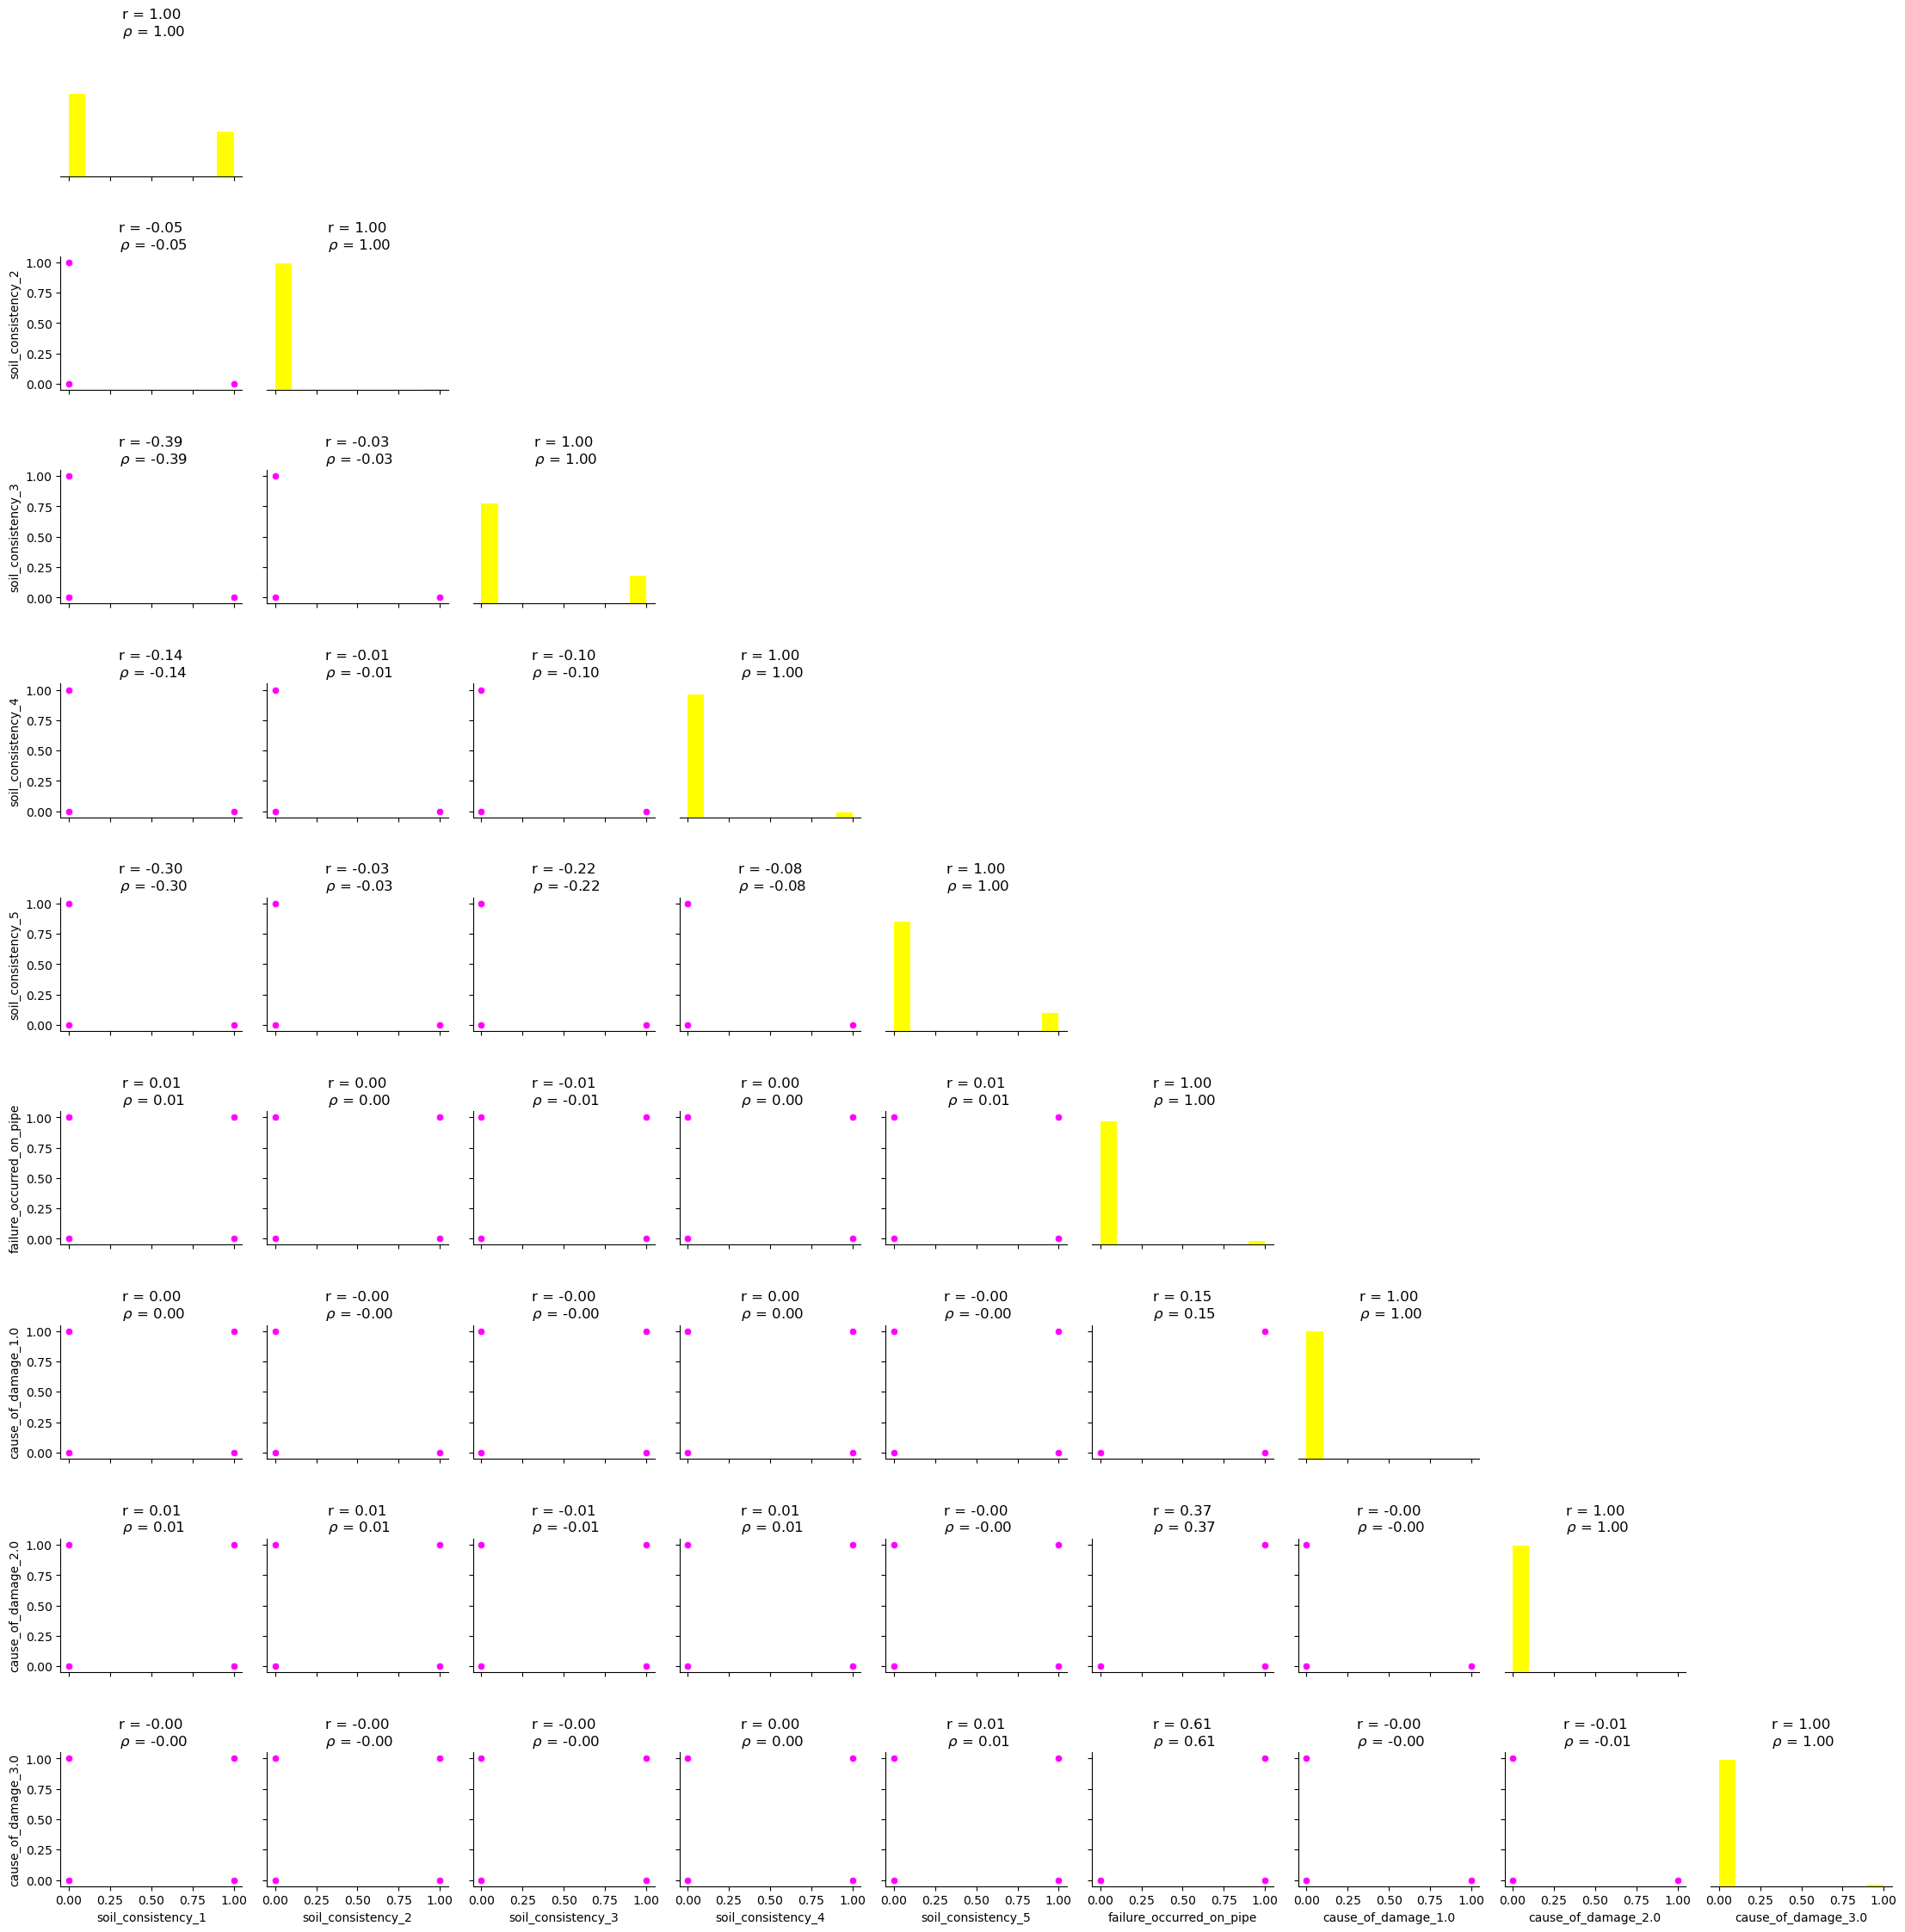

In [62]:
display_corr_pairs(df_subset_2)

#### Observation: We haven't identified a correlation between the type of soil consistency and the cause of failure or the failure occurrence.

In [63]:
# List of columns to include in the subset 3
selected_columns = ['soil_aggressivity_1', 'soil_aggressivity_2','soil_aggressivity_3', 'soil_aggressivity_4',
                    'failure_occurred_on_pipe','cause_of_damage_1.0', 'cause_of_damage_2.0',
       'cause_of_damage_3.0']

# Create a new DataFrame subset
df_subset_3 = df_pipes_failures_dummies[selected_columns]

# Display the new subset
print(df_subset_3.head())

   soil_aggressivity_1  soil_aggressivity_2  soil_aggressivity_3  \
0                    0                    0                    1   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    0                    1   
4                    0                    0                    1   

   soil_aggressivity_4  failure_occurred_on_pipe  cause_of_damage_1.0  \
0                    0                         0                    0   
1                    0                         0                    0   
2                    0                         0                    0   
3                    0                         0                    0   
4                    0                         0                    0   

   cause_of_damage_2.0  cause_of_damage_3.0  
0                    0                    0  
1                    0                    0  
2             

In [64]:
def display_correlation(df):
    r = df_subset_3.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [65]:
def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None
                            )      

    r = display_correlation(df)
    rho = df.corr(method="pearson")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="yellow")
    g.map_lower(sns.scatterplot,color="magenta")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    plt.show()

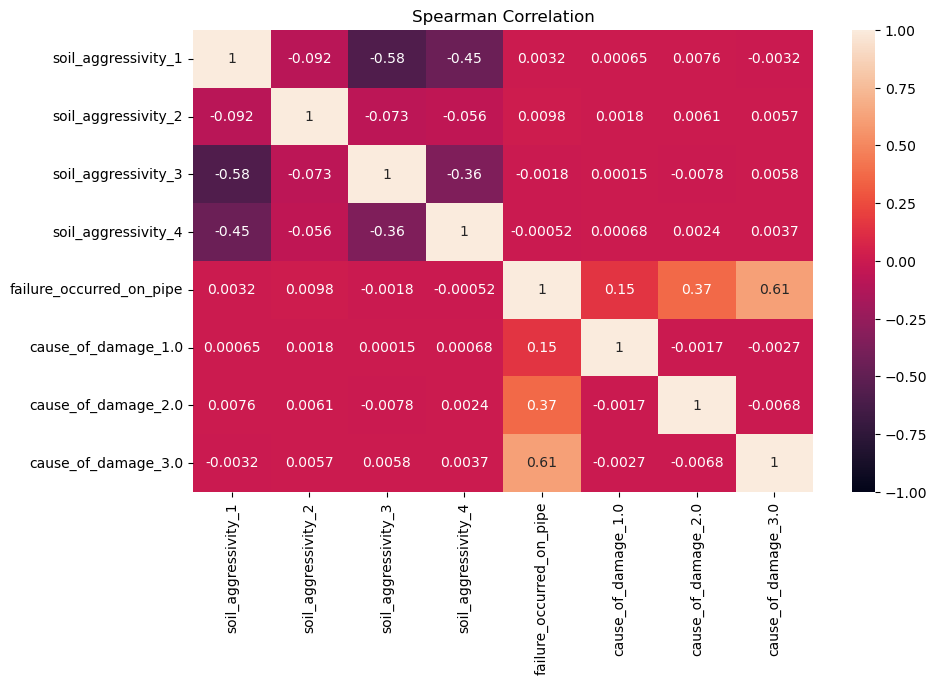

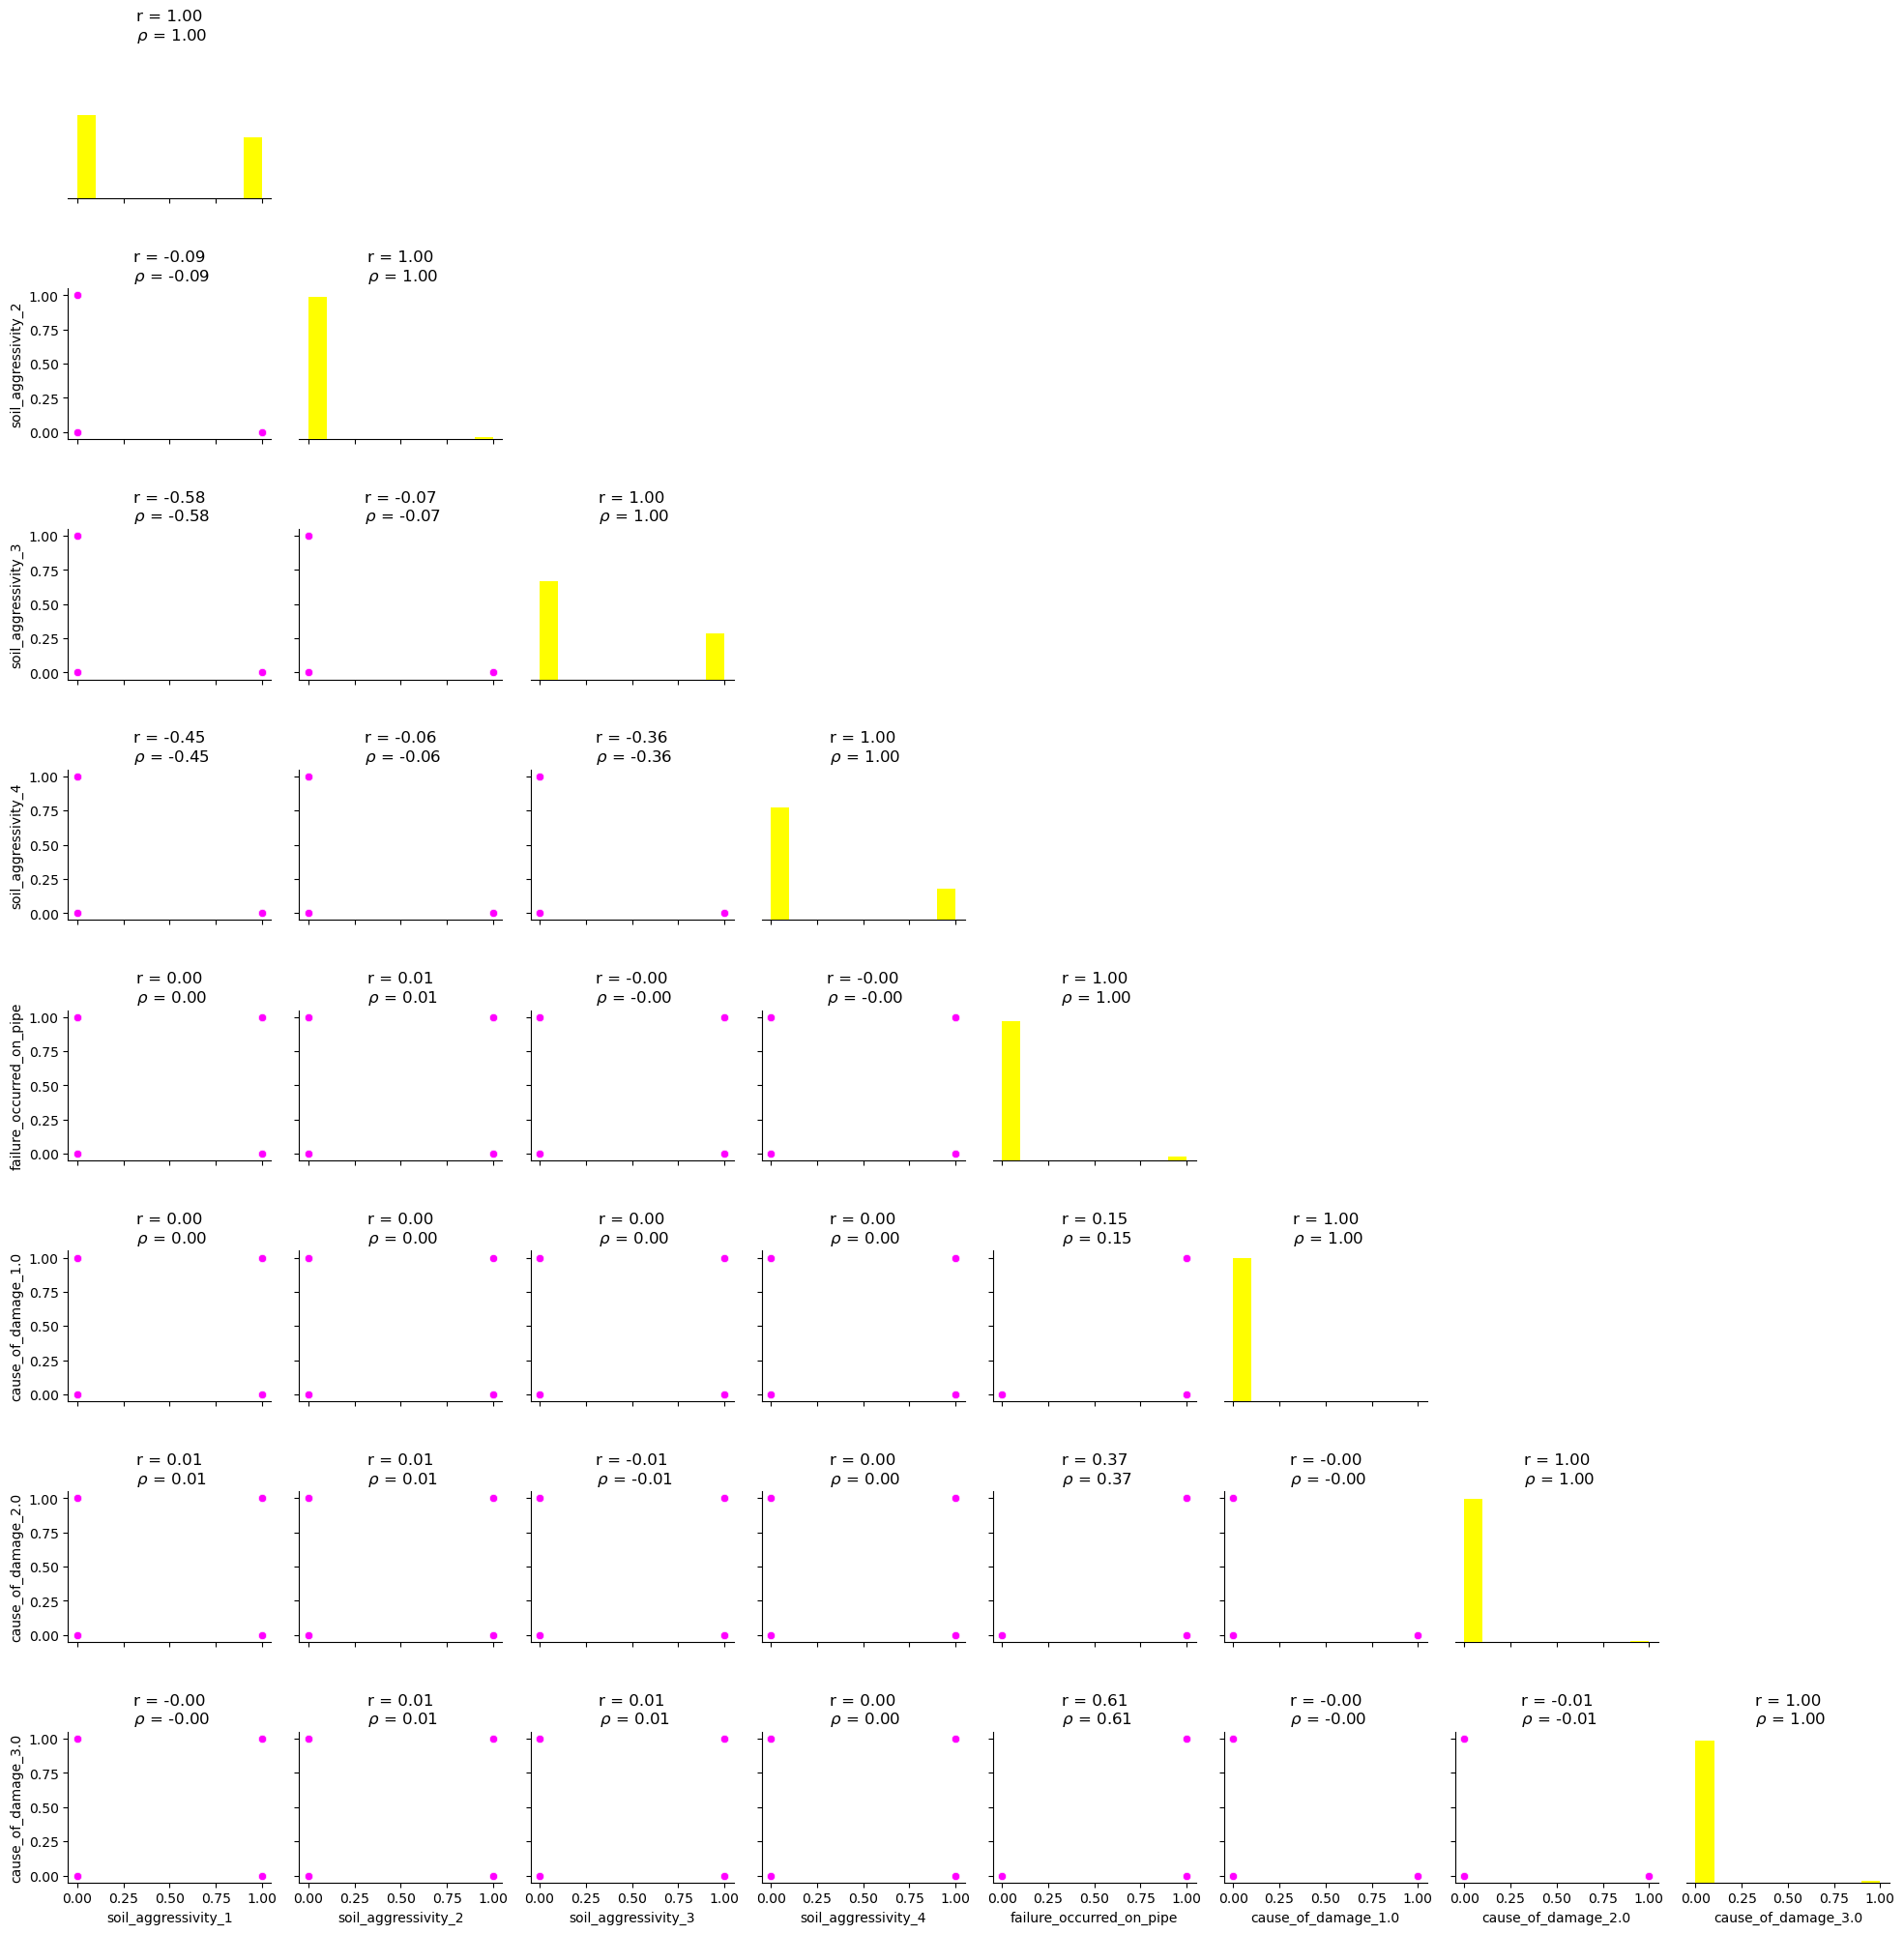

In [66]:
display_corr_pairs(df_subset_3)

#### Observation: We haven't identified a correlation between the type of soil aggressivity and the cause of failure or the failure occurrence.

In [67]:
# List of columns to include in the subset 4
selected_columns = ['groundwater_1.0',
       'groundwater_2.0', 'groundwater_3.0',
                    'failure_occurred_on_pipe','cause_of_damage_1.0', 'cause_of_damage_2.0',
       'cause_of_damage_3.0']

# Create a new DataFrame subset
df_subset_4 = df_pipes_failures_dummies[selected_columns]

# Display the new subset
print(df_subset_4.head())

   groundwater_1.0  groundwater_2.0  groundwater_3.0  \
0                1                0                0   
1                1                0                0   
2                1                0                0   
3                1                0                0   
4                1                0                0   

   failure_occurred_on_pipe  cause_of_damage_1.0  cause_of_damage_2.0  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   

   cause_of_damage_3.0  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  


In [68]:
def display_correlation(df):
    r = df_subset_4.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [69]:
def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None
                            )      

    r = display_correlation(df)
    rho = df.corr(method="pearson")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="yellow")
    g.map_lower(sns.scatterplot,color="magenta")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    plt.show()

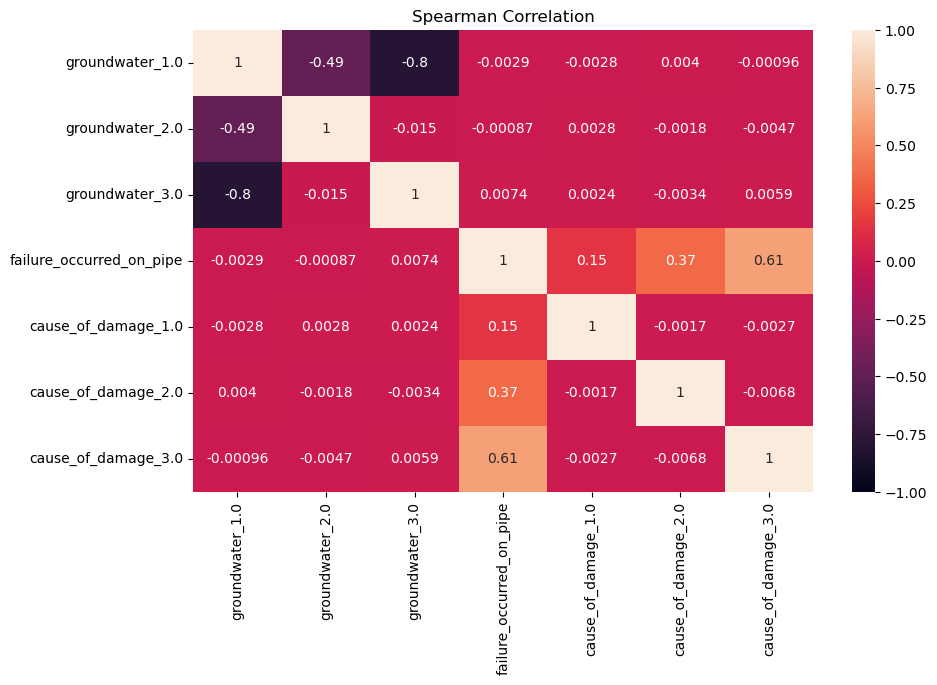

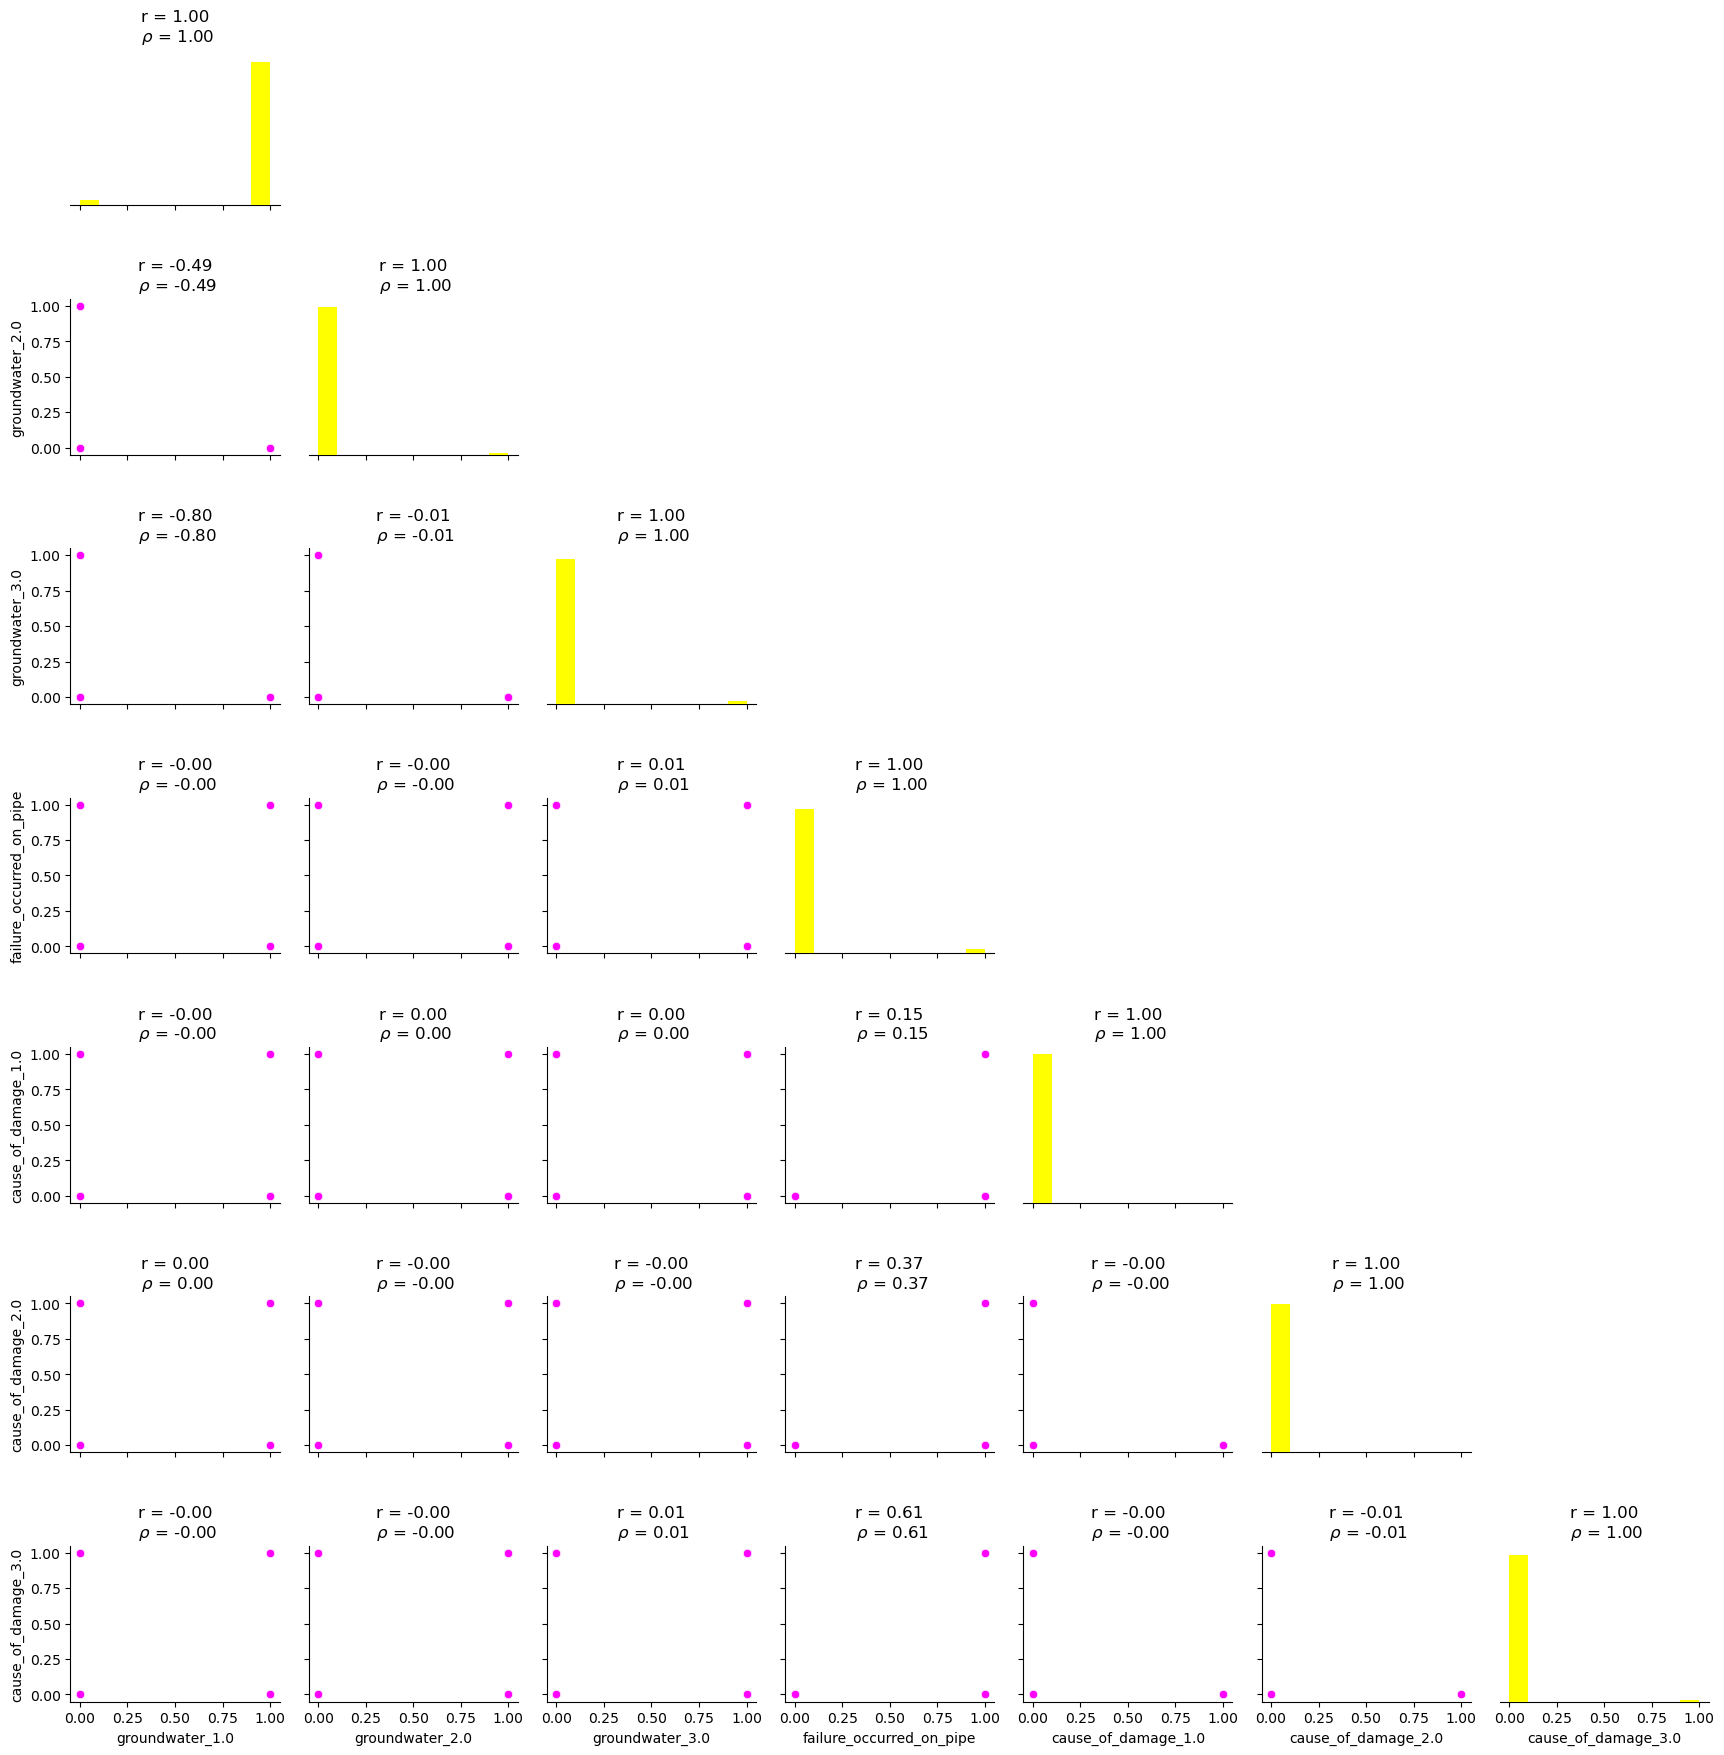

In [70]:
display_corr_pairs(df_subset_4)

#### Observation: We haven't identified a correlation between the level of groundwater and the cause of failure or the failure occurrence.

In [71]:
# List of columns to include in the subset 5
selected_columns = ['traffic_load_1',
       'traffic_load_2', 'traffic_load_3', 'traffic_load_4', 'traffic_load_5', 'failure_occurred_on_pipe', 'cause_of_damage_1.0', 'cause_of_damage_2.0',
       'cause_of_damage_3.0']

# Create a new DataFrame subset
df_subset_5 = df_pipes_failures_dummies[selected_columns]

# Display the new subset
print(df_subset_5.head())

   traffic_load_1  traffic_load_2  traffic_load_3  traffic_load_4  \
0               1               0               0               0   
1               1               0               0               0   
2               1               0               0               0   
3               1               0               0               0   
4               1               0               0               0   

   traffic_load_5  failure_occurred_on_pipe  cause_of_damage_1.0  \
0               0                         0                    0   
1               0                         0                    0   
2               0                         0                    0   
3               0                         0                    0   
4               0                         0                    0   

   cause_of_damage_2.0  cause_of_damage_3.0  
0                    0                    0  
1                    0                    0  
2                    0                

In [72]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [73]:
def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None
                            )      

    r = display_correlation(df)
    rho = df.corr(method="pearson")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="yellow")
    g.map_lower(sns.scatterplot,color="magenta")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    plt.show()

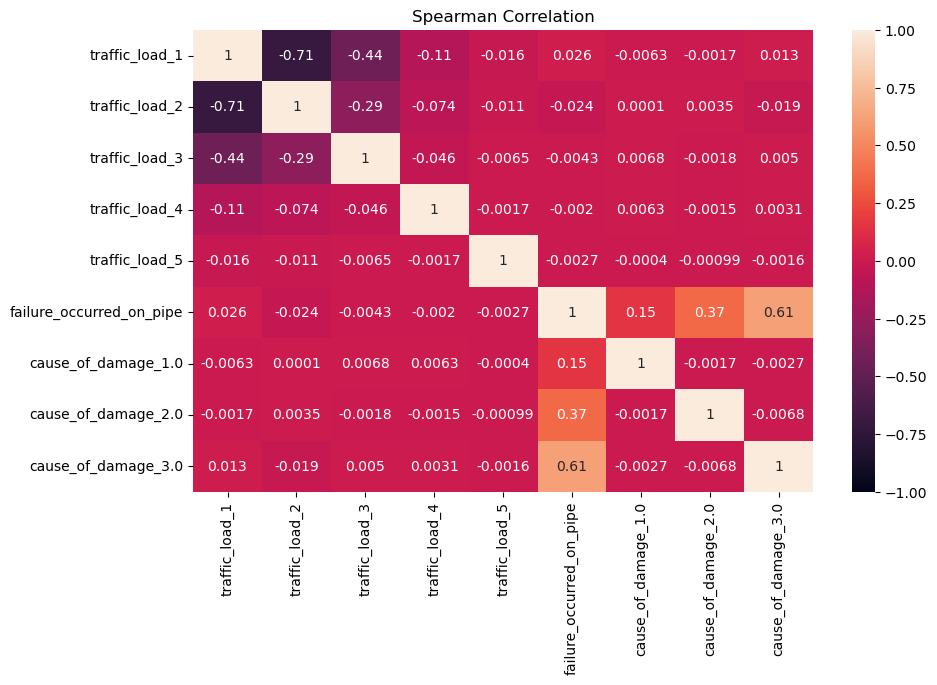

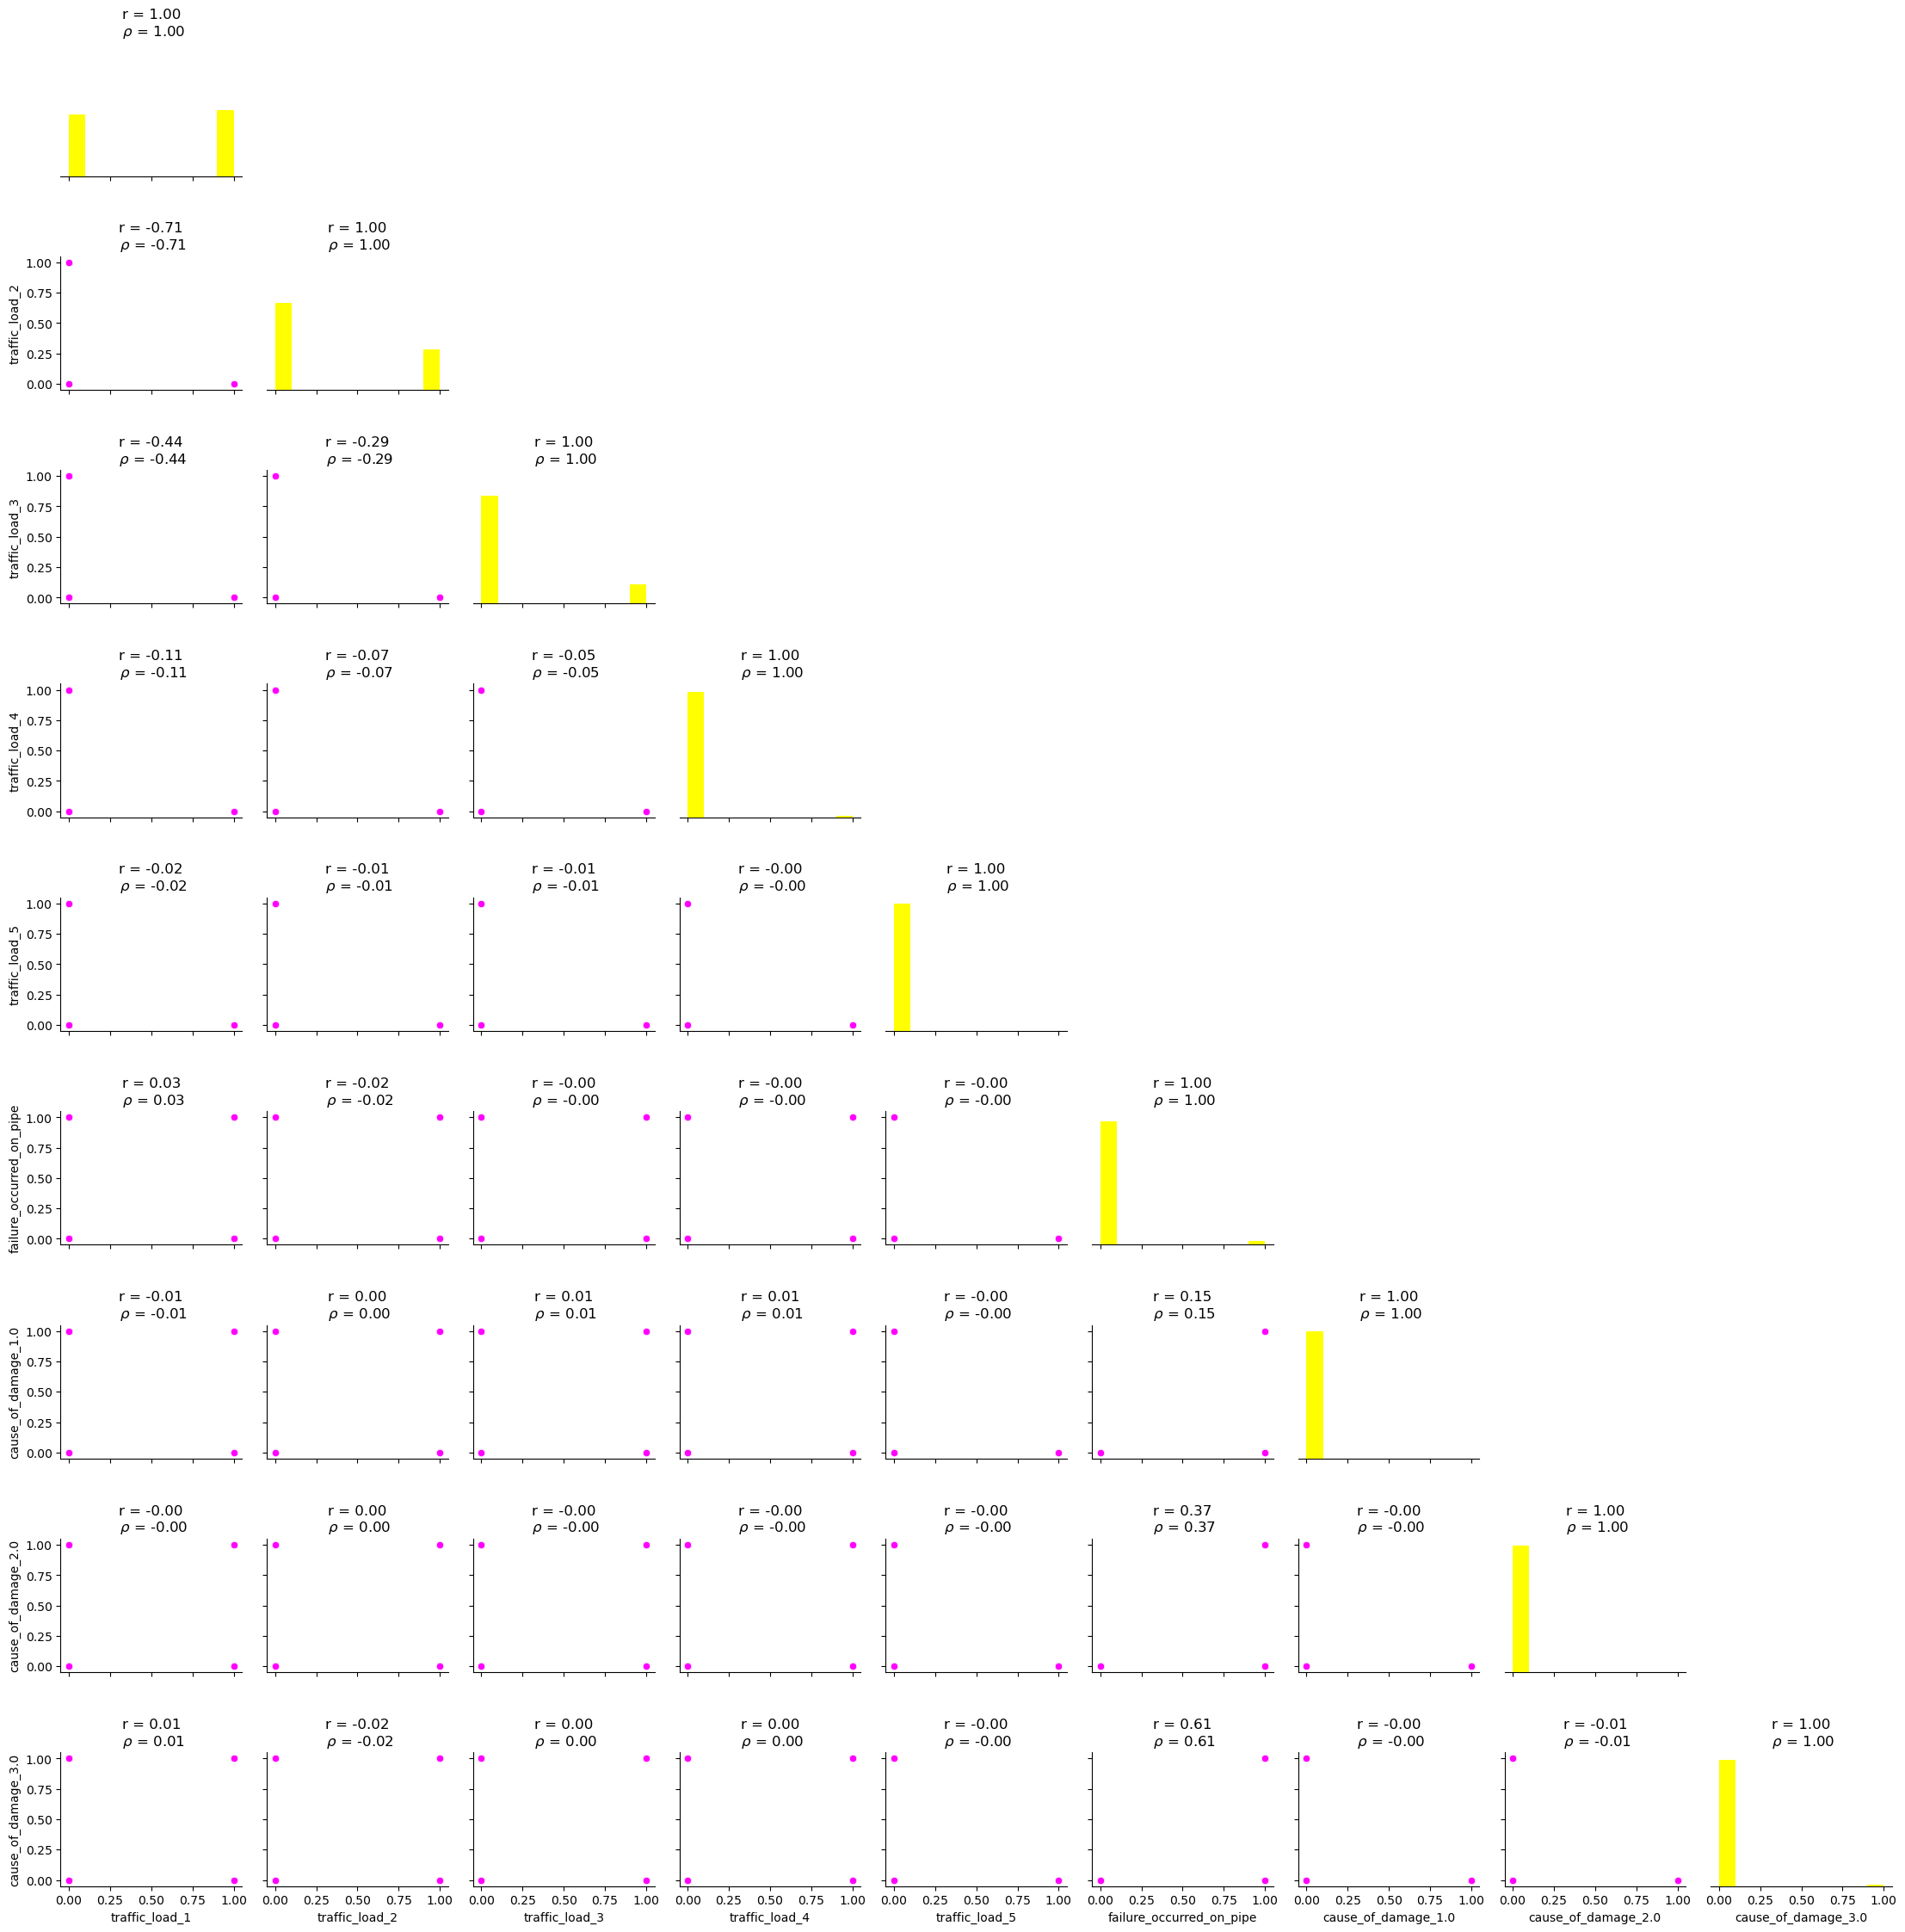

In [74]:
display_corr_pairs(df_subset_5)

#### Observation: We haven't identified a correlation between type of traffic load  and the cause of failure or the failure occurrence.

In [75]:
# List of columns to include in the subset 6
selected_columns = ['stray_electricity_1', 'stray_electricity_2', 'stray_electricity_3',
       'stray_electricity_4', 'failure_occurred_on_pipe', 'cause_of_damage_1.0', 'cause_of_damage_2.0',
       'cause_of_damage_3.0']

# Create a new DataFrame subset
df_subset_6 = df_pipes_failures_dummies[selected_columns]

# Display the new subset
print(df_subset_6.head())

   stray_electricity_1  stray_electricity_2  stray_electricity_3  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    0                    0   
4                    0                    0                    1   

   stray_electricity_4  failure_occurred_on_pipe  cause_of_damage_1.0  \
0                    1                         0                    0   
1                    0                         0                    0   
2                    0                         0                    0   
3                    1                         0                    0   
4                    0                         0                    0   

   cause_of_damage_2.0  cause_of_damage_3.0  
0                    0                    0  
1                    0                    0  
2             

In [76]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [77]:
def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None
                            )      

    r = display_correlation(df)
    rho = df.corr(method="pearson")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="yellow")
    g.map_lower(sns.scatterplot,color="magenta")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    plt.show()

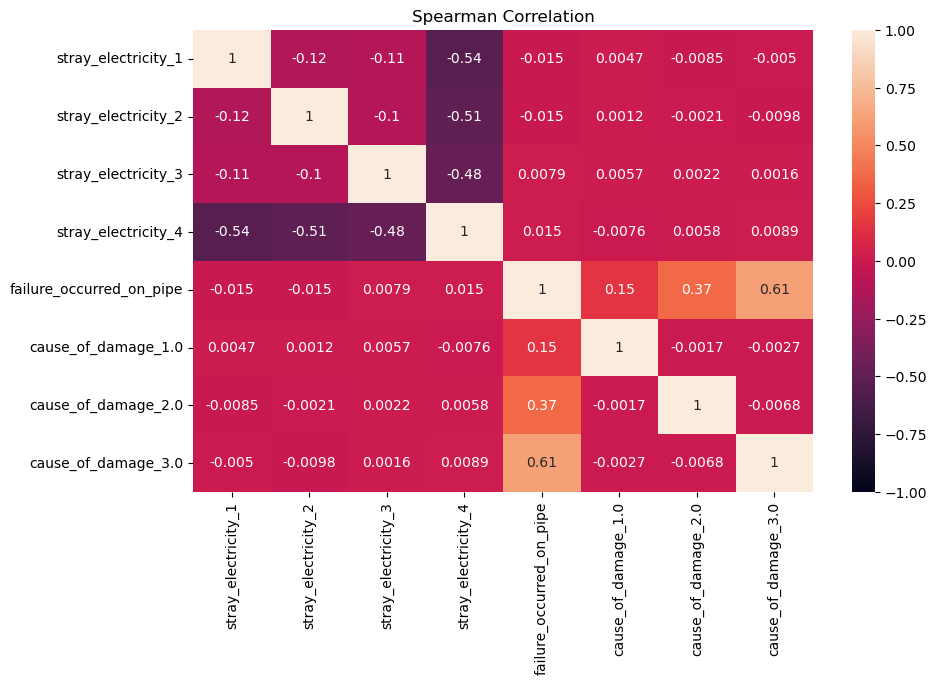

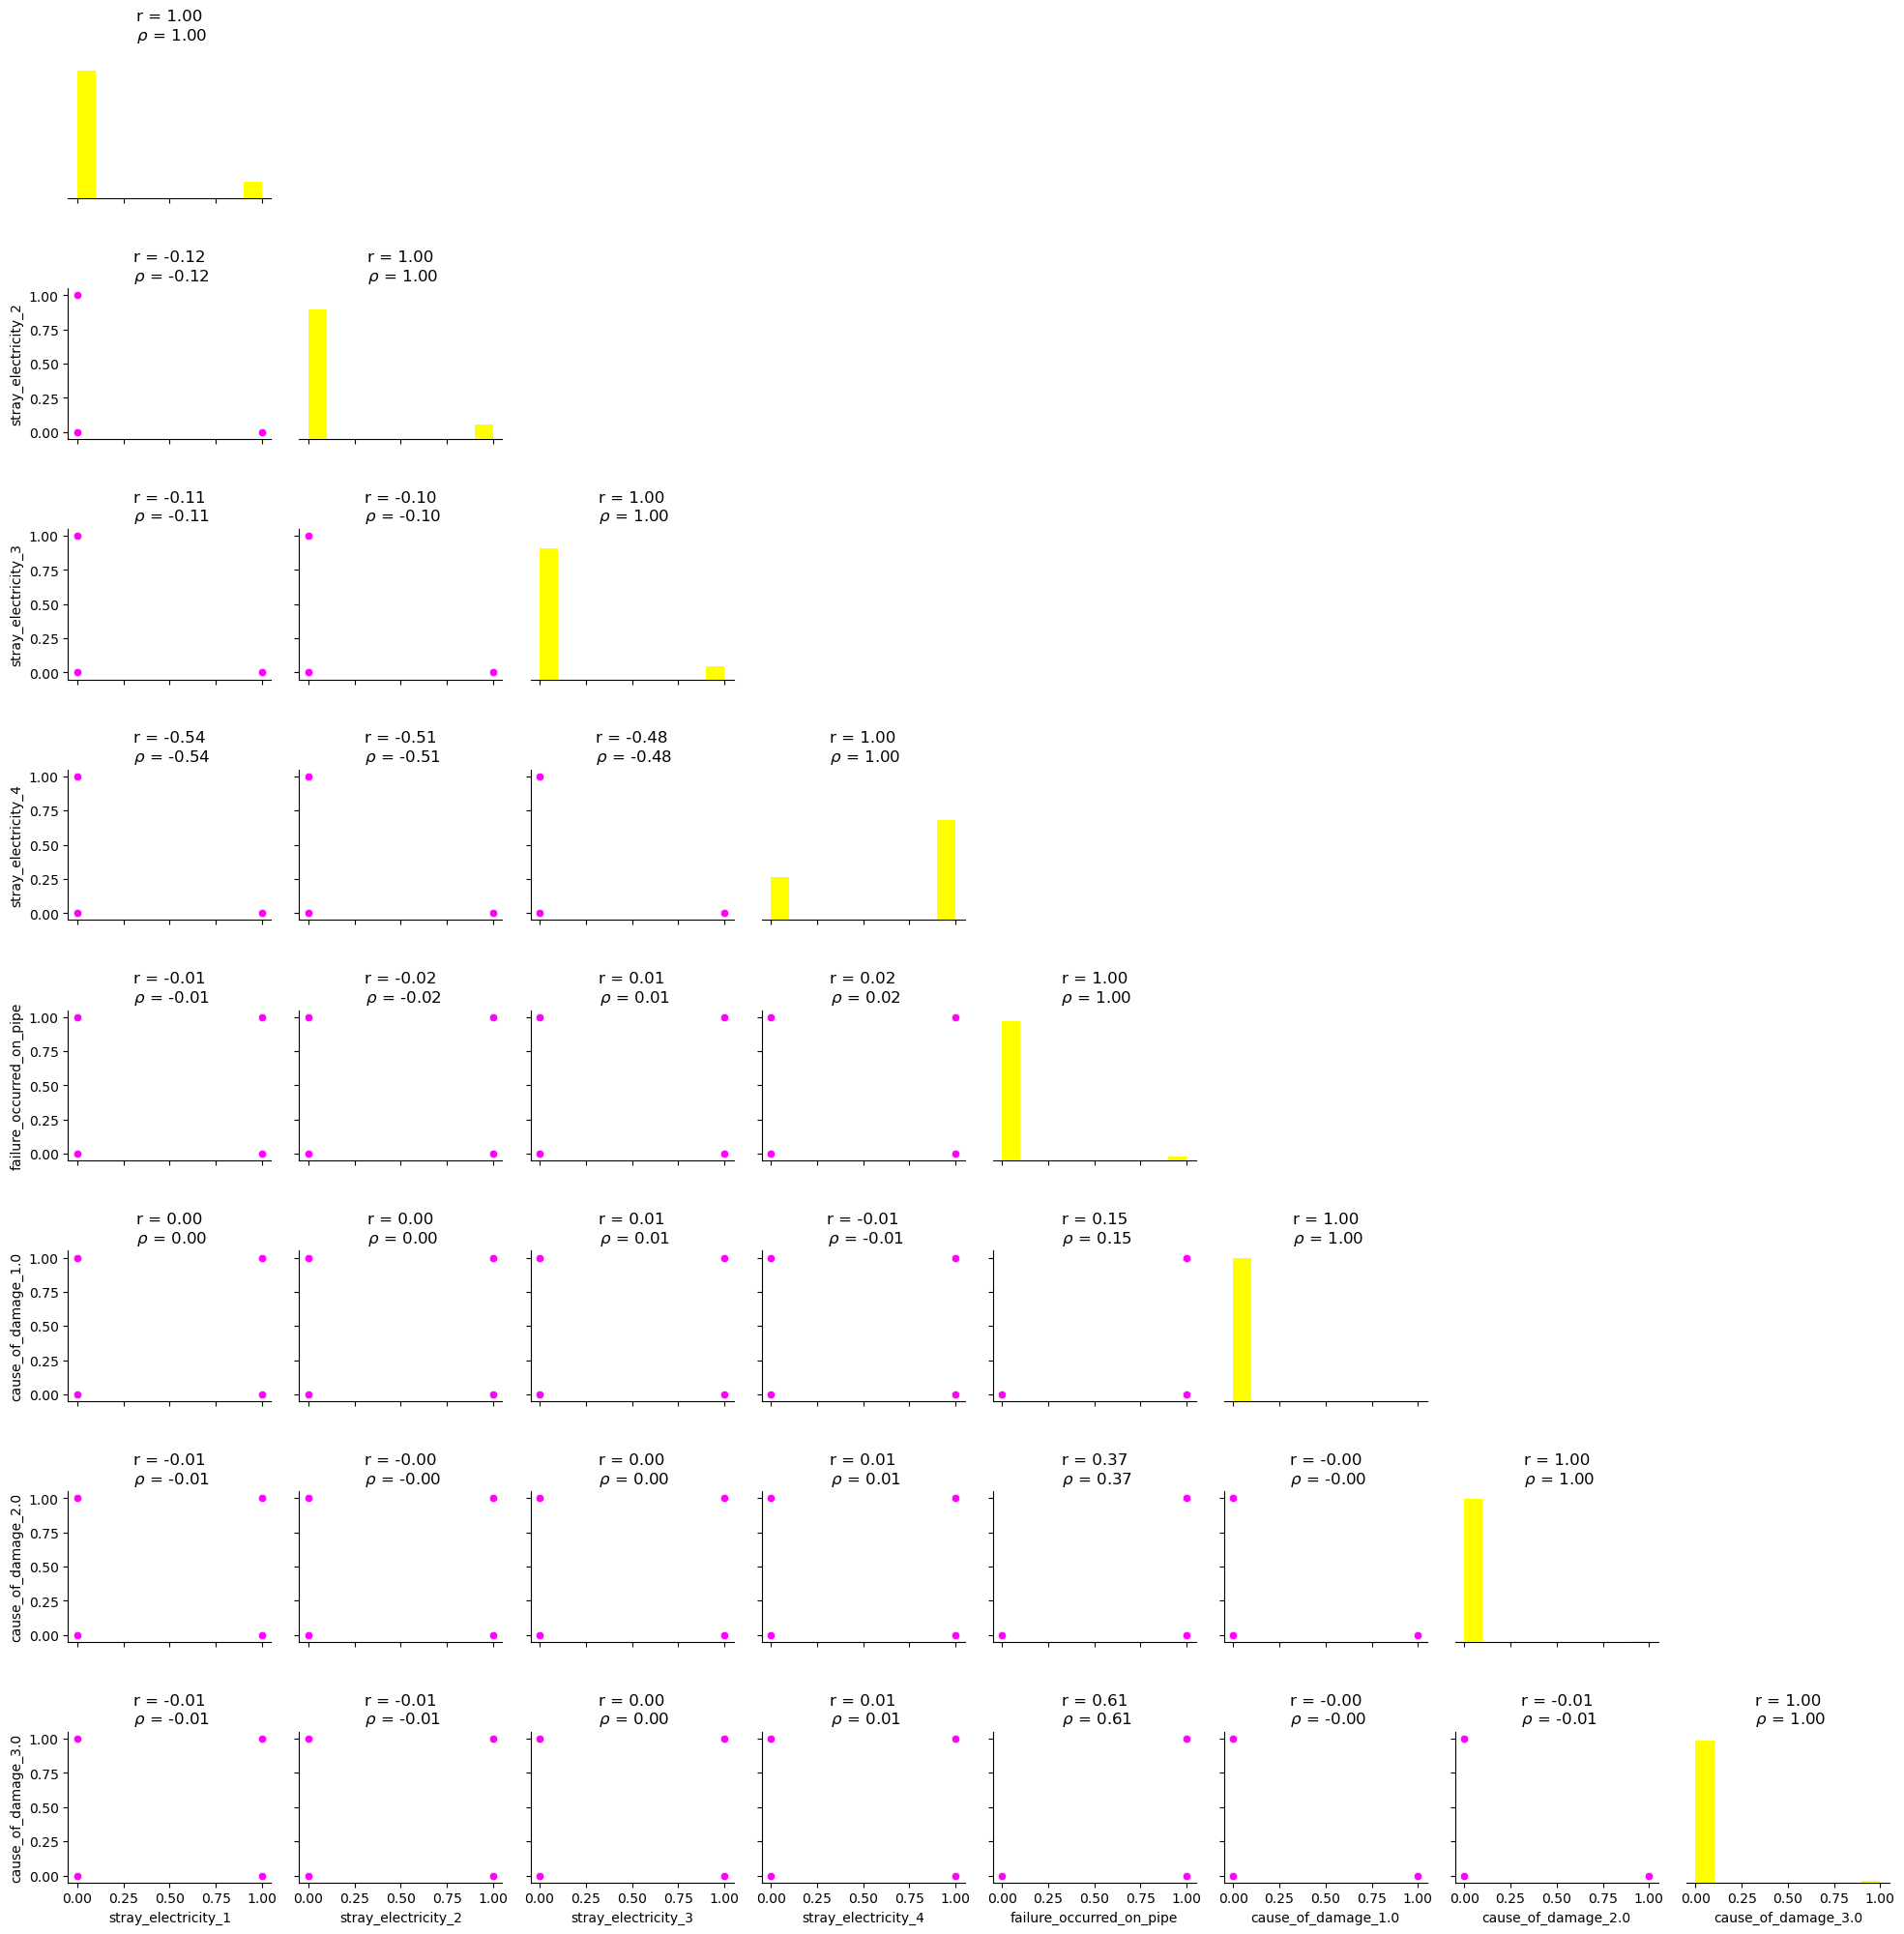

In [78]:
display_corr_pairs(df_subset_6)

#### Observation: We haven't identified a correlation between the distance of the  pipeline to the closest electrical source or stray electricity and the cause of failure or the failure occurrence.

## Common Observation: 
### Lack of Strong Correlation with Failure Occurrence:

I haven't identified a strong correlation between the analyzed factors (both structural and environmental) and the occurrence of pipe failures. This suggests that the linear relationship between these individual factors and failure occurrence may not be significant.

### Correlation Among Structural Factors:
I've observed that some of the structural factors are correlated with each other.

2.1. Strong negative correlation  (correlation coefficient of - 0.68) between pipe age and pipe material.  This implies that as the pipe age increases, there is a tendency for a certain type of material to be less prevalent, or vice versa.

2.2.Weak relationship (correlation coefficient of 0.21) between pipe diameter and pipe length. This indicates a mild association between these two structural factors.


### Interpretation:

The lack of strong correlation with failure occurrence might suggest that failures are influenced by a combination of factors rather than individual factors in isolation.
The observed correlations among structural factors provide insights into how these factors relate to each other, which can be valuable for understanding the overall condition of the pipes.


### 4.2 Scatterplots 

#### Note: I've created a scatter plot for educational purposes to depict the correlation between the variables "diameter" and "length." However, it's crucial to emphasize that this relationship is not relevant to the project objectives.

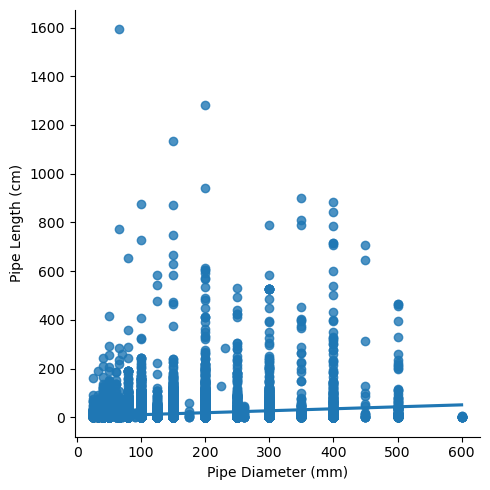

In [79]:
# Create a scatterplot for the "diameter" and "length" columns in seaborn

scatterplot = sns.lmplot(x = 'diameter', y = 'length', data = df_pipes_failures)

# Set x and y-axis labels
scatterplot.set_axis_labels("Pipe Diameter (mm)", "Pipe Length (cm)")

# Show the plot
plt.show()

### Observation: Identifying a clear trend is challenging, but there appears to be a subtle positive correlation between the variables. The trend line, although slightly inclined, is not steep, and numerous data points deviate significantly from this line. Notably, I've identified an outlier with a diameter of 80mm and a length of 1600 cm. This scatterplot emphasizes that the association between "pipe diameter" and "pipe length" is not strictly linear, indicating a more complex relationship between these two variables.

### 4.3 Pair Plots

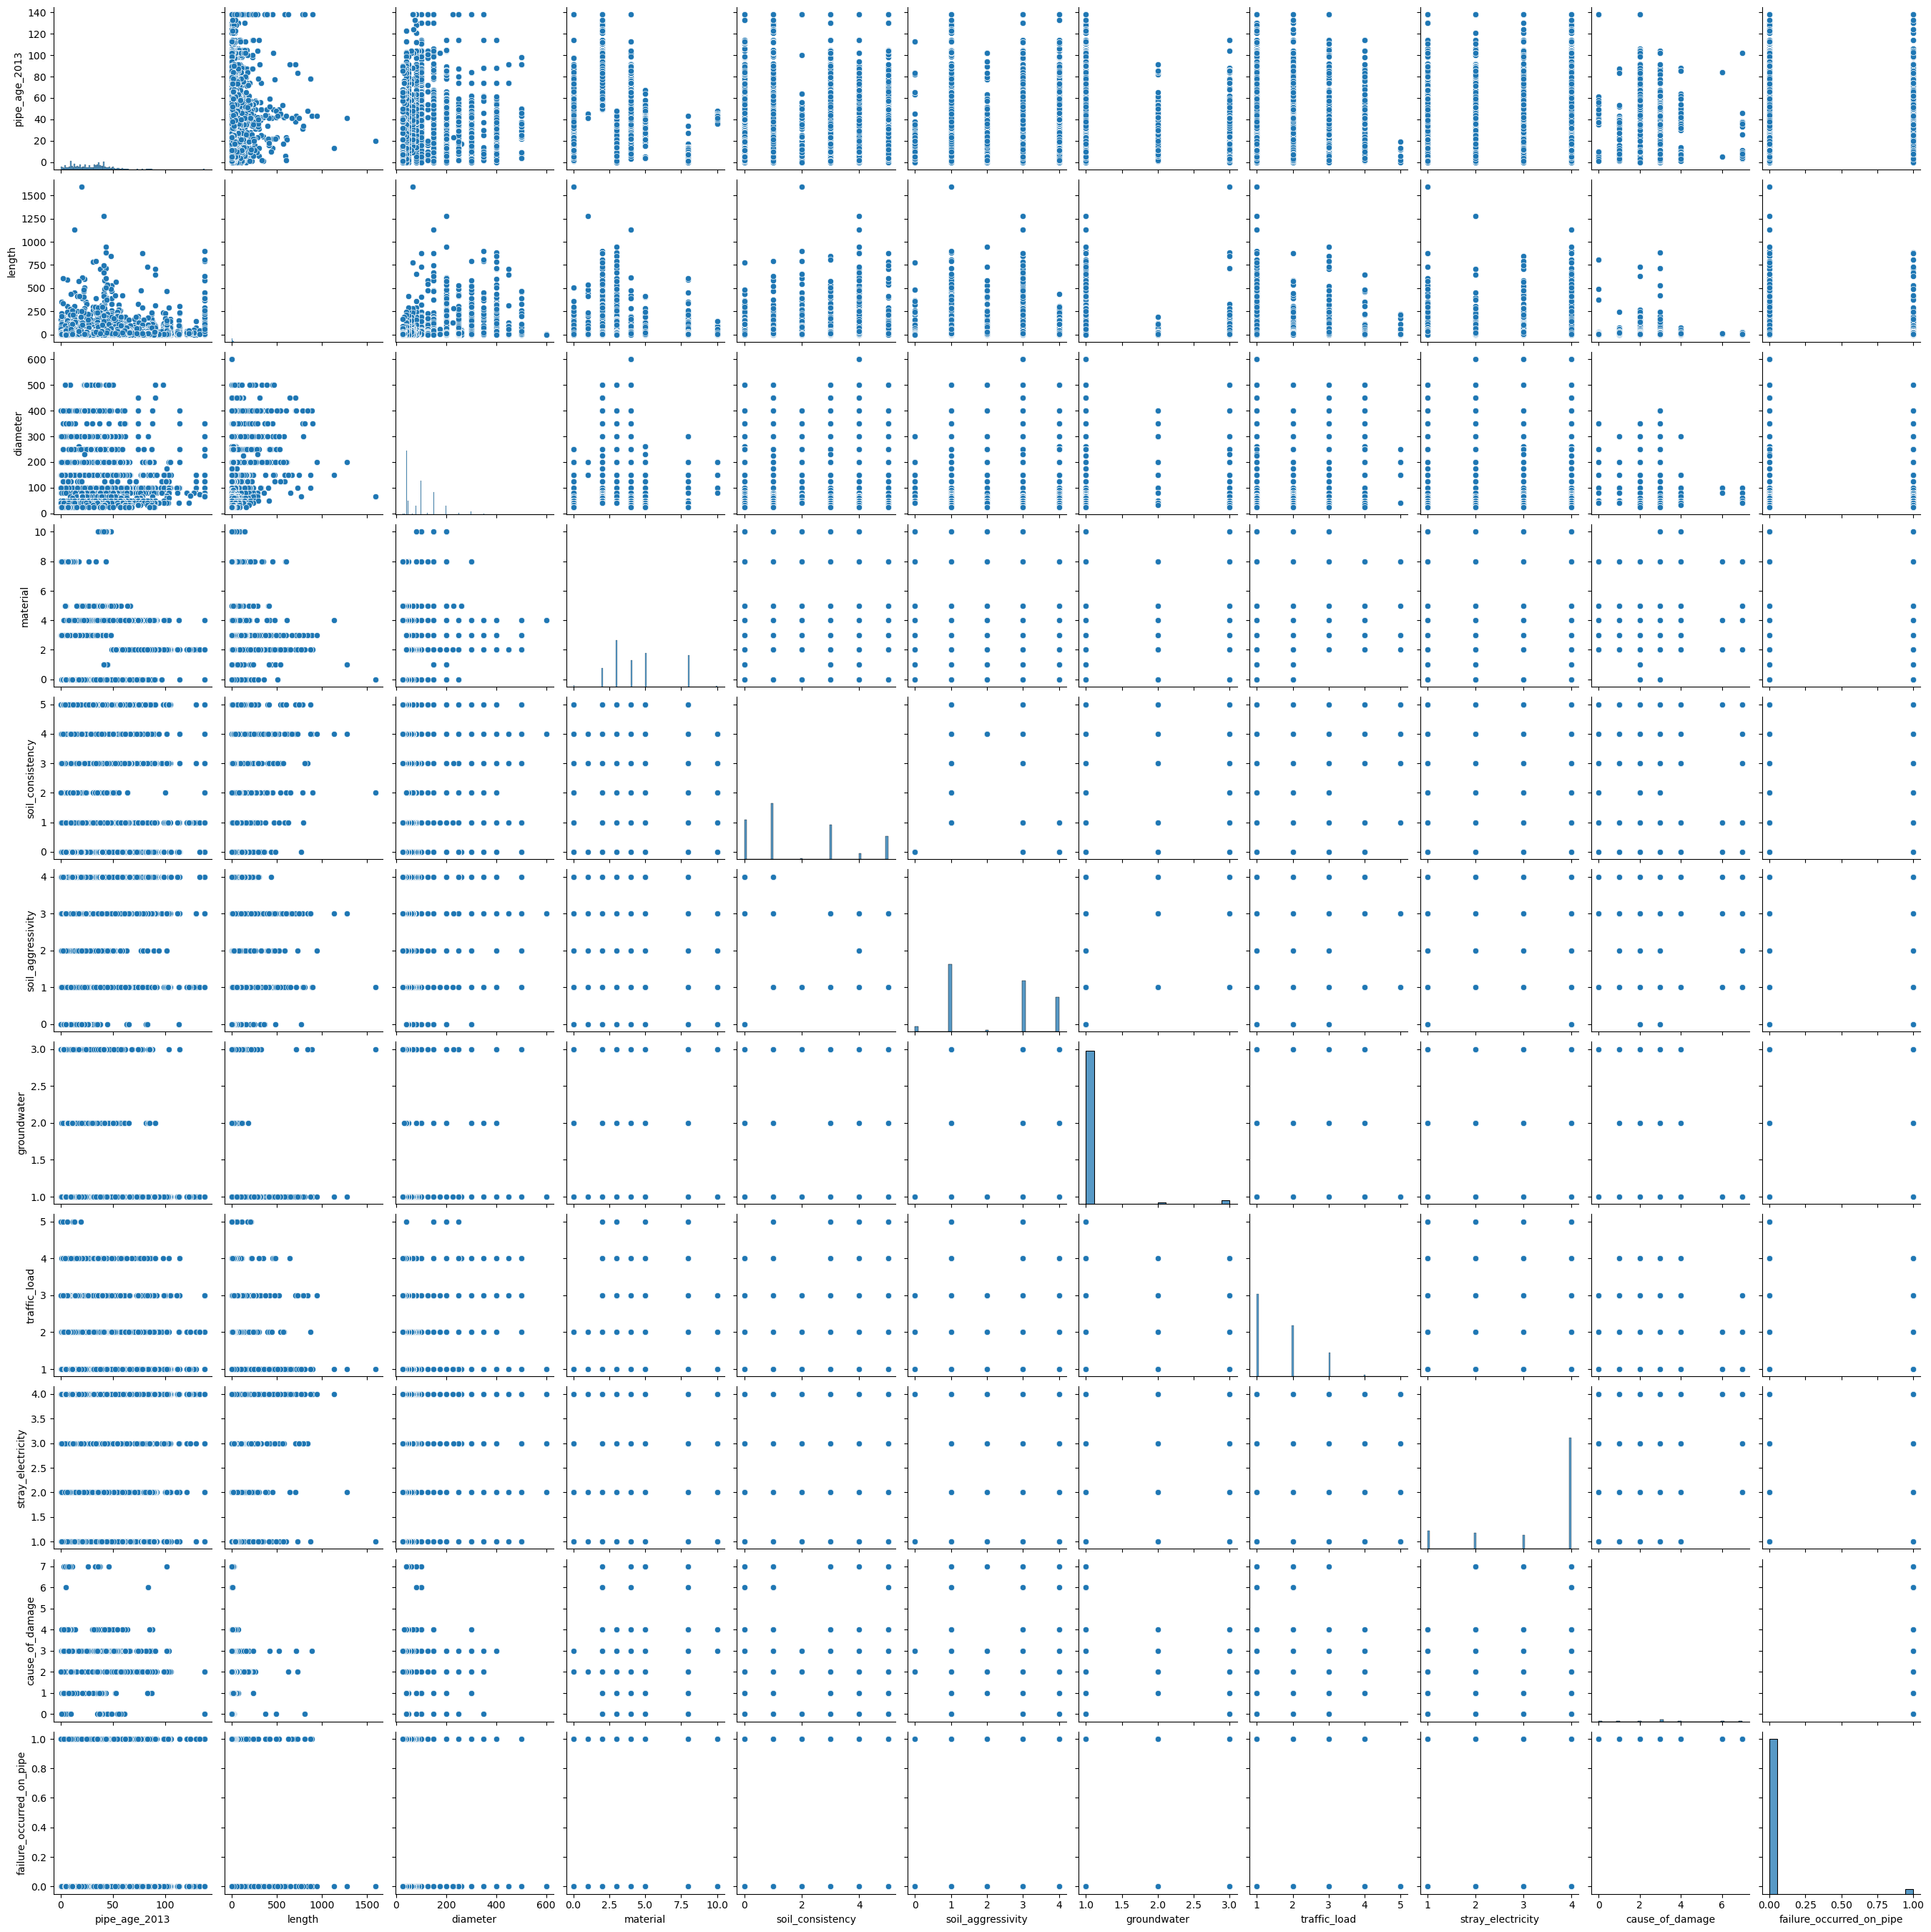

In [80]:
# Create a pair plot 

g = sns.pairplot(df_pipes_failures)

### Observation: In this pair plot, only the top-left three plots display numerical variables (length, diameter, and pipe age). The remaining plots illustrate categorical variables, resulting in a more organized appearance compared to their numerical counterparts. While these charts can be interpreted similarly to continuous scatterplots, a more meaningful interpretation will be provided in the subsequent step 4.4, which involves categorical plots. The relationships among length-diameter, pipe age-length, and pipe age-diameter observed in the initial plots don't suggest a strong correlation. The upcoming categorical plots (step 4.4) will aid in identifying reliable predictors for further analysis.

### 4.4 Categorical Plots

### 4.4.1. Creating a categorical variable that splits the "pipe_age" column into categories

Text(0.5, 1.0, 'Histogram of Pipe Age')

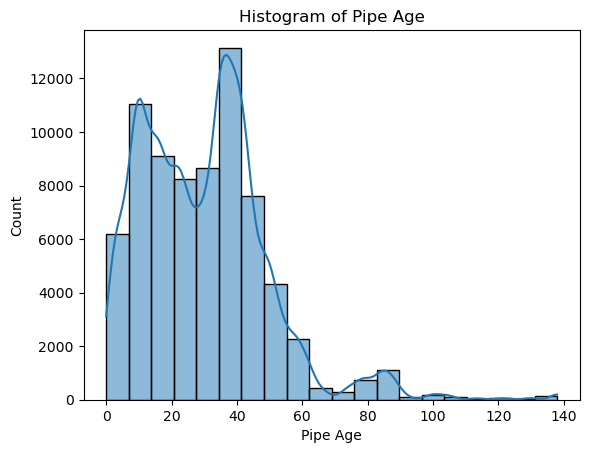

In [81]:
# Use a histogram to visualize the distribution of the variables. 
# This way, we can determine sensible categories for the pipe_age. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_pipes_failures['pipe_age_2013'], bins = 20, kde = True)
plt.xlabel('Pipe Age')
plt.title('Histogram of Pipe Age')

In [82]:
# Creating category for pipes in the early stage of their life cycle
df_pipes_failures.loc[df_pipes_failures['pipe_age_2013'] < 20, 'pipe age category'] = 'Young Pipes'

In [83]:
# Creating category for pipes in the mid-range of their life cycle
df_pipes_failures.loc[(df_pipes_failures['pipe_age_2013'] >= 20) & (df_pipes_failures['pipe_age_2013'] < 50), 'pipe age category'] = 'Middle-Aged Pipes'

In [84]:
# Creating category for pipes that have been in use for a considerable period
df_pipes_failures.loc[df_pipes_failures['pipe_age_2013'] >= 50, 'pipe age category'] = 'Old Pipes'

In [85]:
# Export the new dataset
df_pipes_failures.to_excel(os.path.join(path, '02 Data','Prepared Data', 'pipes_failures_pipe_age_category.xlsx'))

In [86]:
df_pipes_failures['pipe age category'].value_counts(dropna = False)

Middle-Aged Pipes    39686
Young Pipes          25347
Old Pipes             8820
NaN                   5493
Name: pipe age category, dtype: int64

#### Count the pipes that had a failure occurrence by pipe age category.

In [87]:
# Filters the DataFrame to include only rows where 'failure_occurred_on_pipe' is 1 and then counts the occurrences of each 'pipe age category'
df_pipes_failures[df_pipes_failures['failure_occurred_on_pipe'] == 1]['pipe age category'].value_counts(dropna=False)

Middle-Aged Pipes    1028
Old Pipes             668
Young Pipes           421
NaN                   178
Name: pipe age category, dtype: int64

In [88]:
# Filters the DataFrame to include only rows where 'failure_occurred_on_pipe' is 1 and then counts the occurrences of each 'pipe age category'
result = df_pipes_failures[df_pipes_failures['failure_occurred_on_pipe'] == 1]['pipe age category'].value_counts(dropna=False)

# Sort the index in the specified order
result = result.reindex(['Middle-Aged Pipes', 'Young Pipes', 'Old Pipes', np.nan])

# Display the result
print(result)

Middle-Aged Pipes    1028
Young Pipes           421
Old Pipes             668
NaN                   178
Name: pipe age category, dtype: int64


#### Calculate the percentage of pipes that experienced a failure relative to the total number of pipes in each age category

In [89]:
# Count the occurrences of each pipe age category where 'failure_occurred_on_pipe' is 1
count_df = df_pipes_failures[df_pipes_failures['failure_occurred_on_pipe'] == 1]['pipe age category'].value_counts()

# Count the total occurrences of each pipe age category
total_count_df = df_pipes_failures['pipe age category'].value_counts()

# Sort the index in the specified order
count_df = count_df.reindex(['Middle-Aged Pipes', 'Young Pipes', 'Old Pipes', np.nan])
total_count_df = total_count_df.reindex(['Middle-Aged Pipes', 'Young Pipes', 'Old Pipes', np.nan])

# Calculate the percentage
percentage_df = (count_df / total_count_df) * 100

# Display the results
print("Count of Failures by Pipe Age Category:")
print(count_df)

print("\nTotal Count of Pipes by Pipe Age Category:")
print(total_count_df)

print("\nPercentage of Failures by Pipe Age Category:")
print(percentage_df)

Count of Failures by Pipe Age Category:
Middle-Aged Pipes    1028.0
Young Pipes           421.0
Old Pipes             668.0
NaN                     NaN
Name: pipe age category, dtype: float64

Total Count of Pipes by Pipe Age Category:
Middle-Aged Pipes    39686.0
Young Pipes          25347.0
Old Pipes             8820.0
NaN                      NaN
Name: pipe age category, dtype: float64

Percentage of Failures by Pipe Age Category:
Middle-Aged Pipes    2.590334
Young Pipes          1.660946
Old Pipes            7.573696
NaN                       NaN
Name: pipe age category, dtype: float64


### 4.4.2. Visualisation of pipes that experienced a failure with annotaion of  the percentage relative to the total number of pipes for each age category 

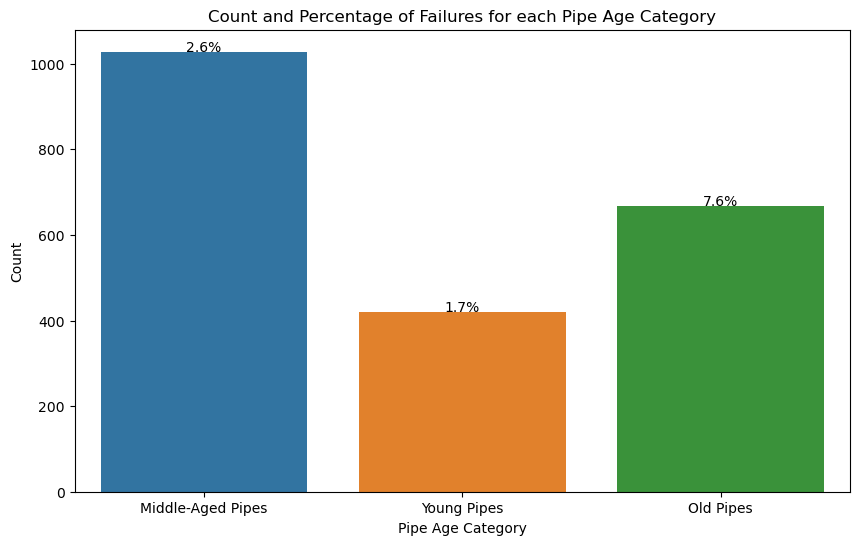

Middle-Aged Pipes    1028
Young Pipes           421
Old Pipes             668
Name: pipe age category, dtype: int64


In [90]:
# Filters the DataFrame to include only rows where 'failure_occurred_on_pipe' is 1
result = df_pipes_failures[df_pipes_failures['failure_occurred_on_pipe'] == 1]['pipe age category'].value_counts(dropna=False)

# Sort the index in the specified order, excluding 'Unknown'
categories_order = ['Middle-Aged Pipes', 'Young Pipes', 'Old Pipes']
result = result.reindex(categories_order)

# Count the total occurrences of each pipe age category, excluding 'Unknown'
total_count_df = df_pipes_failures['pipe age category'].value_counts()
total_count_df = total_count_df.loc[categories_order]

# Create a count plot for 'pipe age category' where 'failure_occurred_on_pipe' is 1
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="pipe age category", data=df_pipes_failures[df_pipes_failures['failure_occurred_on_pipe'] == 1], order=categories_order)

# Add percentage annotations on top of each bar relative to the total count in that category
for category, p in zip(result.index, ax.patches):
    percentage = '{:.1f}%'.format(100 * result[category] / total_count_df[category])
    x_position = p.get_x() + p.get_width() / 2
    y_position = p.get_height() + 0.05
    ax.annotate(percentage, (x_position, y_position), ha='center')

plt.xlabel('Pipe Age Category')
plt.ylabel('Count')
plt.title('Count and Percentage of Failures for each Pipe Age Category')
plt.show()

# Display the result
print(result)

### Observation: The analysis reveals that the "Old Pipes" category exhibits the highest percentage of failures among the different pipe age categories. This observation logically suggests a recommendation for the rehabilitation planning of the water supply network. To prioritize and optimize the replacement efforts, special attention should be given to the older pipes, particularly those exceeding 50 years.

### However, it is crucial to conduct further analysis, considering the pipe material in relation to the number of failures. This additional examination will help understand whether the older pipes with varying materials have different patterns of failures. By identifying correlations between age, material, and failure occurrences, a more targeted and effective strategy for pipe replacement can be developed.

### 4.4.3. Visualisation of the count of pipes with failures and the total number of pipes for each pipe age category and material

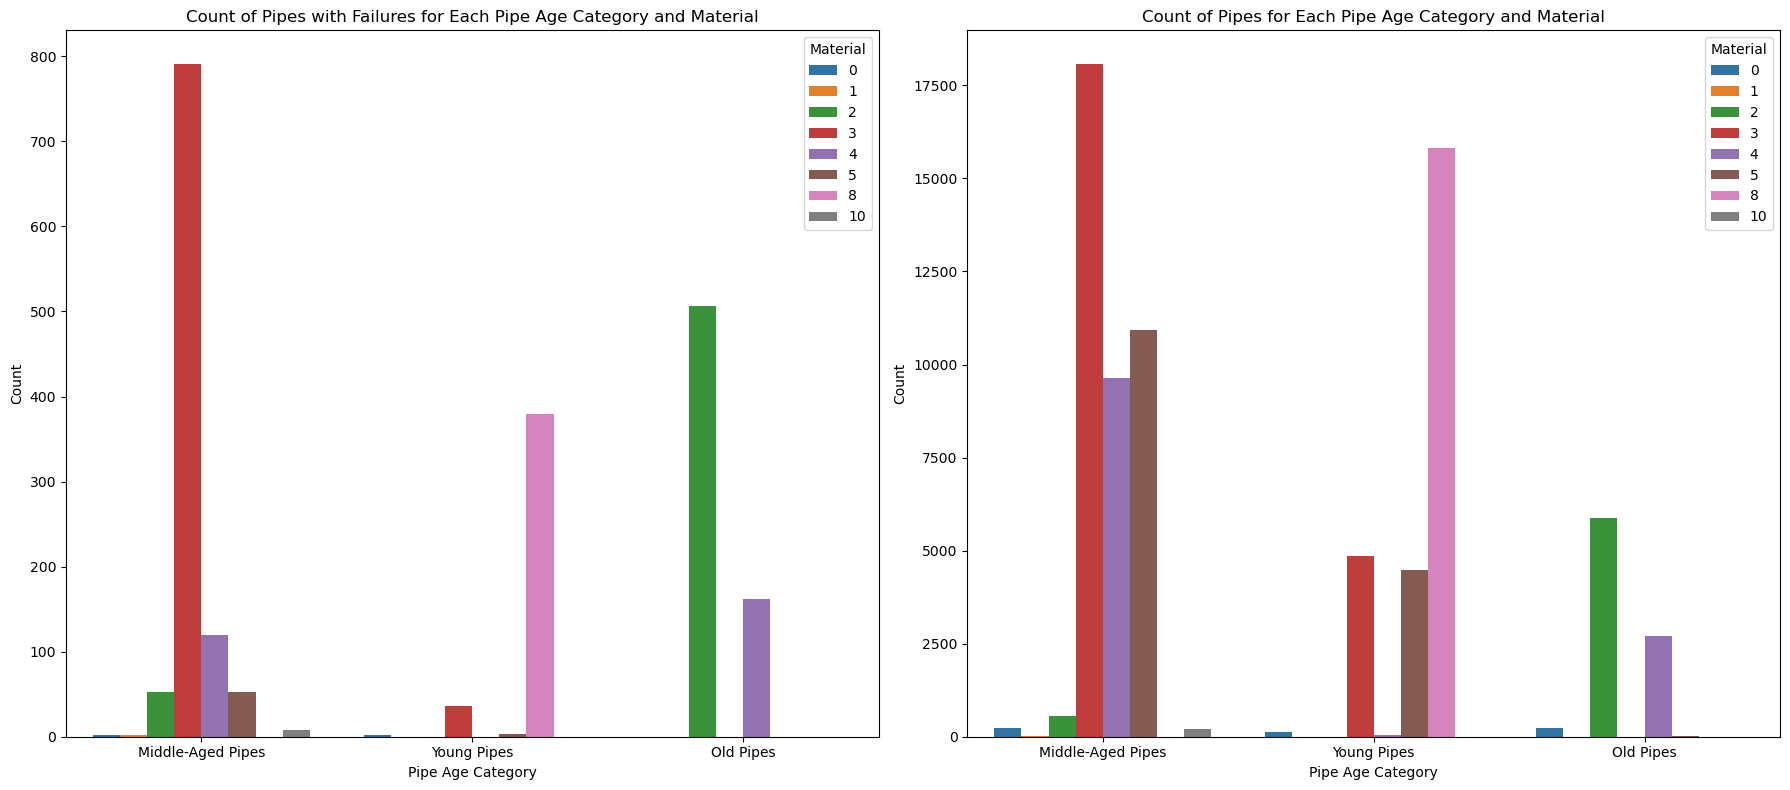

In [91]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Code 1
filtered_df_1 = df_pipes_failures[df_pipes_failures['failure_occurred_on_pipe'] == 1]
categories_order = ['Middle-Aged Pipes', 'Young Pipes', 'Old Pipes']

sns.countplot(x="pipe age category", hue="material", data=filtered_df_1, order=categories_order, ax=axes[0])
axes[0].set_xlabel('Pipe Age Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Pipes with Failures for Each Pipe Age Category and Material')
axes[0].legend(title='Material', loc='upper right')

# Code 2
filtered_df_2 = df_pipes_failures[df_pipes_failures['failure_occurred_on_pipe'].isin([0, 1])]
sns.countplot(x="pipe age category", hue="material", data=filtered_df_2, ax=axes[1])
axes[1].set_xlabel('Pipe Age Category')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Pipes for Each Pipe Age Category and Material')
axes[1].legend(title='Material', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

#### Code for pipe material: 1 = asbestos cement, 2 = cast iron, 3 = ductile cast iron, 4 = steel , 5-9 = polyethylene pipes, 10 = PVC

### Observation: 
#### Upon examining the two plots, we note that within the "Old Pipes" category, failures are exclusively associated with cast iron (67%) and steel pipes (31%). Although failures occur on both pipe materials, the percentage is higher for cast iron. In the "Middle-Aged Pipes" category, we observe the presence of pipes made from ductile cast iron (46%), polyethylene (28%), and steel (24%).  The failure percentages reflect the distribution of these materials among all pipes in that age group, and failures are dominating for ductal cast irons pipes and cast iron pipes. This pattern continues for "Young Pipes," where the higher percentage of failures in polyethylene aligns with its predominant presence in the total pipe count for that category.
#### The information provided can be valuable in prioritizing and optimizing replacement efforts for the water supply network. Here are some considerations:

### Prioritization Based on Material and Age:

#### Old Pipes: Given that failures in the "Old Pipes" category are predominantly associated with cast iron pipes, prioritizing the replacement of pipes made from these material may be a strategic approach.
#### Middle-Aged Pipes: For this category, where failures are distributed among ductile cast iron, polyethylene, and steel, focusing on the replacement of ductile cast iron pipes might be effective, as they have a higher failure percentage.
#### Young Pipes: Failures are notably higher in polyethylene pipes. Given that this category comprises relatively new pipes, it is premature to conclude that failure occurrence correlates directly with the age of the pipe. Therefore, a more in-depth analysis is warranted to investigate the specific causes of these failures.
### Additional Analysis for Root Cause:

#### While material and age provide initial insights, conducting a more in-depth analysis to understand the root causes of failures for each pipe material is crucial.
#### Investigating factors such as corrosion, soil movement or external influences can provide insights into why certain materials are more prone to failures.
### Holistic Approach:

#### Combining information on material-age distribution with a detailed analysis of failure causes will enable a more holistic approach to replacement planning.
#### This approach allows for targeted interventions based on both the material and the specific reasons behind failures.

### 4.4.4. Combining information on material-age distribution with the failure cause categories.

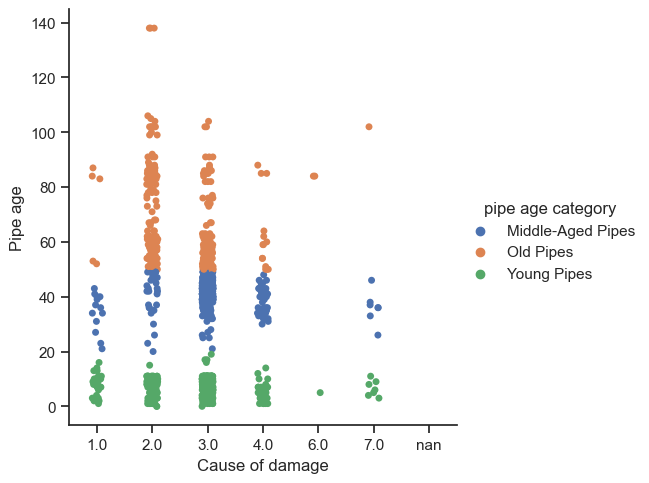

In [92]:
# Filter the DataFrame to exclude rows where 'cause_of_damage' is 0
filtered_df = df_pipes_failures[df_pipes_failures['cause_of_damage'] != 0]

# Create a categorical plot in seaborn using the pipe age categories created above
sns.set(style="ticks")
g = sns.catplot(x="cause_of_damage", y="pipe_age_2013", hue="pipe age category", data=filtered_df)
plt.xlabel('Cause of damage')
plt.ylabel('Pipe age')
# Save the plot as an image file (e.g., PNG)
plt.savefig("material_age_distribution.png")
# Show the plot
plt.show()

#### Code for cause of damage: 0 = unknown 1 = external influences, 2 = soil movement, 3 = corrosion, 4 = Deficiencies , 5 = Frost, 6 = Defective Socket, 7 = pipe connection, 8. bedding

### Observation: In the case of old pipes, the predominant causes of defects are soil movement and corrosion. For middle-aged pipes, corrosion takes the lead, while for young pipes, pinpointing the exact cause of defects is challenging. These observations align logically with the pipe materials present in each age category. For example, in the old pipes category, where cast iron and steel pipes are common, defects are likely to result from soil movement and corrosion. In the middle-aged category, ductile cast iron pipes, being ductile, are less prone to failure due to soil movement but can be affected by corrosion, similar to steel pipes.

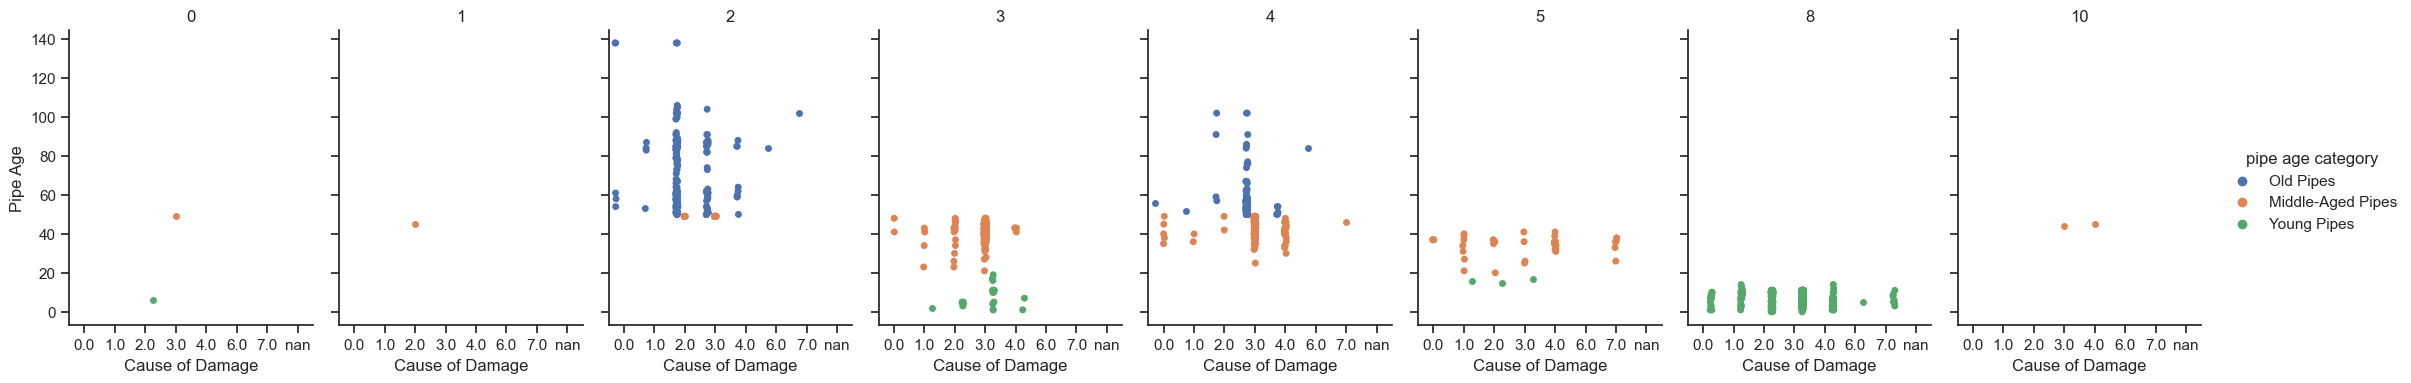

In [93]:
# Create a categorical plot in seaborn for each 'material' category using the pipe age categories created above plot 
sns.set(style="ticks")
g = sns.catplot(x="cause_of_damage", y="pipe_age_2013", hue="pipe age category", col="material", data=df_pipes_failures, kind="strip", height=4, aspect=0.7, dodge=True, jitter=True)

# Set axis labels
g.set_axis_labels('Cause of Damage', 'Pipe Age')

# Adjust title
g.set_titles(col_template="{col_name}")

plt.show()

### 4.4.5. Visualize the main causes of damage for each pipe material

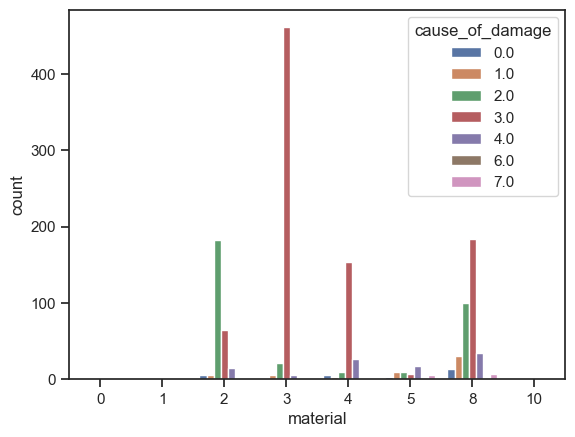

In [94]:
sns.countplot(x='material', hue='cause_of_damage', data=df_pipes_failures)
plt.show()

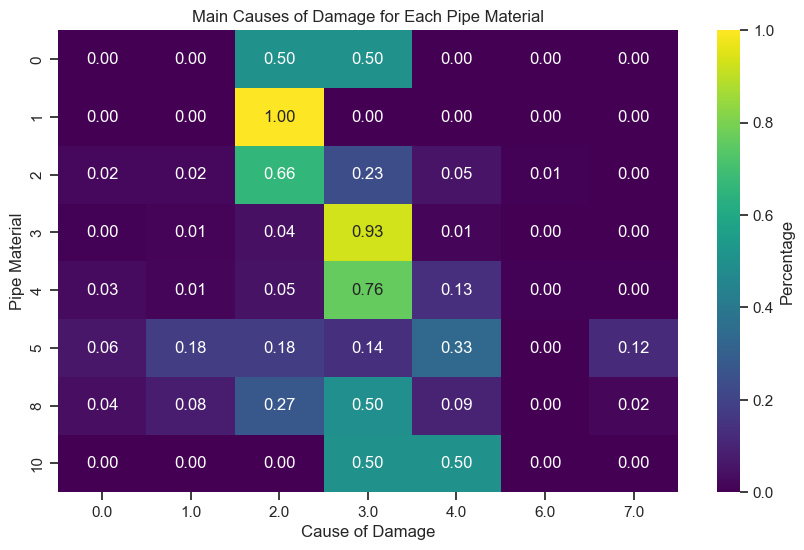

In [95]:
# Create a crosstab to count occurrences of each combination
cross_tab = pd.crosstab(df_pipes_failures['material'], df_pipes_failures['cause_of_damage'])

# Normalize the counts to get percentages
normalized_cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_cross_tab, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title('Main Causes of Damage for Each Pipe Material')
plt.xlabel('Cause of Damage')
plt.ylabel('Pipe Material')
plt.show()

#### Code for pipe material: 0 = unknown, 1 = asbestos cement, 2 = cast iron, 3 = ductile cast iron, 4 = steel , 5 = PE (polyethylene pipes), 8 = PE-100, 10 = PVC
#### Code for cause of damage: 0 = unknown 1 = external influences, 2 = soil movement, 3 = corrosion, 4 = Deficiencies , 5 = Frost, 6 = Defective Socket, 7 = pipe connection, 8. bedding

### Observation:
### Cast Iron Pipes:
#### Primarily found in the category of old pipes.
#### The primary cause of failure is soil movement, with additional cases of corrosion and other factors.
### Ductile Cast Iron Pipes:
#### Predominantly present in the middle-aged and young pipes category.
#### Corrosion stands out as the main cause of failure, though there are instances of failures due to soil movement and external influences.
### Steel Pipes:
#### Found in both old and middle-aged pipes categories.
#### The main cause of failures is corrosion, with additional instances of failures attributed to soil movement, external influences, and other factors.
### Polyethylene Pipes:
#### Material PE - Mainly observed in the middle-aged pipes category and material PE-100 in the young pipes.
#### The data does not clearly indicate a dominant cause of failure. Failures are evenly distributed among soil movement, external influences, and other factors. Corrosion is not relevant for polyethylene pipes.
#### These observations highlight the need for further analysis, particularly in exploring external environmental factors that may contribute to failures. It is essential to conduct a detailed investigation to understand and define the influence of these external factors on the two main causes of failures which are influenced by the environmental factors: soil movement and corrosion. Additionally, the potential biases in the data, especially concerning corrosion in polyethylene pipes, should be addressed in the ongoing analysis.

### 4.4.6. Defining the external environmental factors that  contribute on the two main causes of failures which are influenced by the environmental factors: soil movement and corrosion

In [96]:
# Convert the column to the 'category' data type
df_pipes_failures['material'] = df_pipes_failures['material'].astype('category')
df_pipes_failures['soil_consistency'] = df_pipes_failures['soil_consistency'].astype('category')
df_pipes_failures['soil_aggressivity'] = df_pipes_failures['soil_aggressivity'].astype('category')
df_pipes_failures['groundwater'] = df_pipes_failures['groundwater'].astype('category')
df_pipes_failures['traffic_load'] = df_pipes_failures['traffic_load'].astype('category')
df_pipes_failures['stray_electricity'] = df_pipes_failures['stray_electricity'].astype('category')
df_pipes_failures['cause_of_damage'] = df_pipes_failures['cause_of_damage'].astype('category')

In [97]:
# Get the data types of all columns
column_data_types = df_pipes_failures.dtypes

# Print the result
print(column_data_types)

pipe_age_2013                float64
length                       float64
diameter                     float64
material                    category
soil_consistency            category
soil_aggressivity           category
groundwater                 category
traffic_load                category
stray_electricity           category
cause_of_damage             category
failure_occurred_on_pipe       int32
pipe age category             object
dtype: object


#### Heatmap for frequency of occurrences for different combinations of pipe  'material' and the environmental factors ('soil_consistency# , 'soil_aggressivity', 'groundwater', 'traffic_load' and  'stray_electricity' ) for  category  'cause_of_damage' 2 ( soil movement ) & 3 ( corrosion)

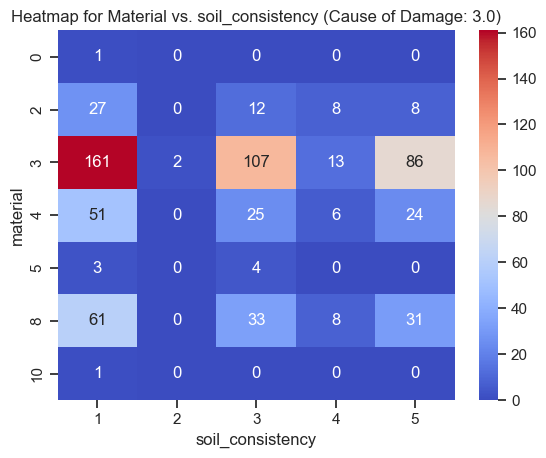

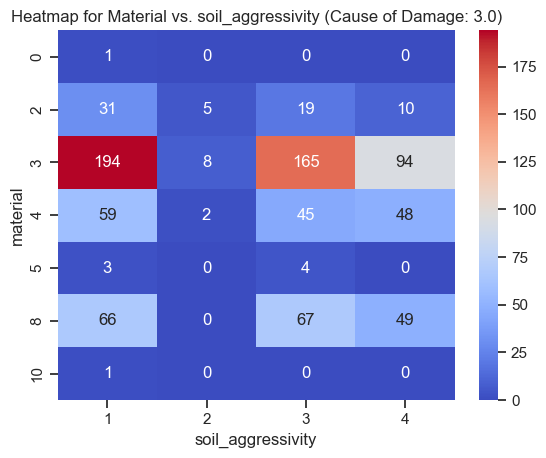

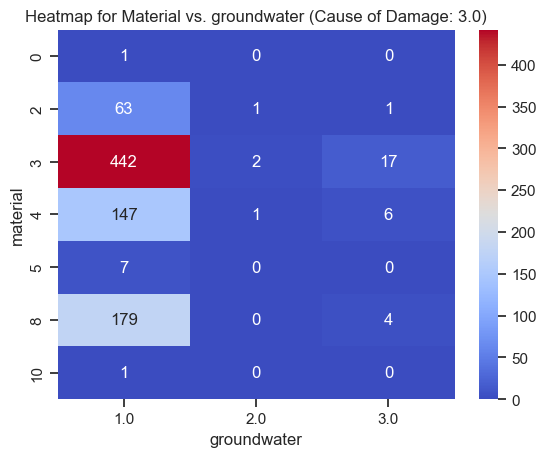

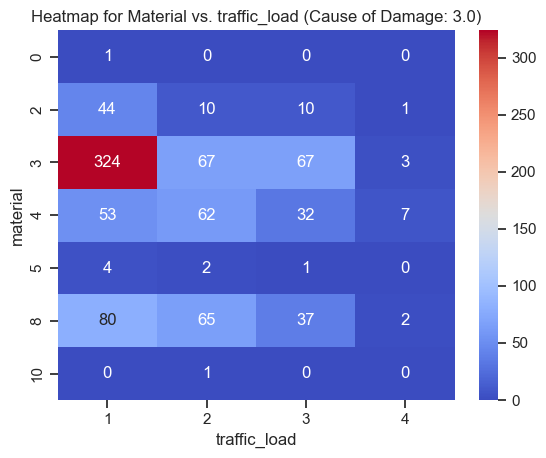

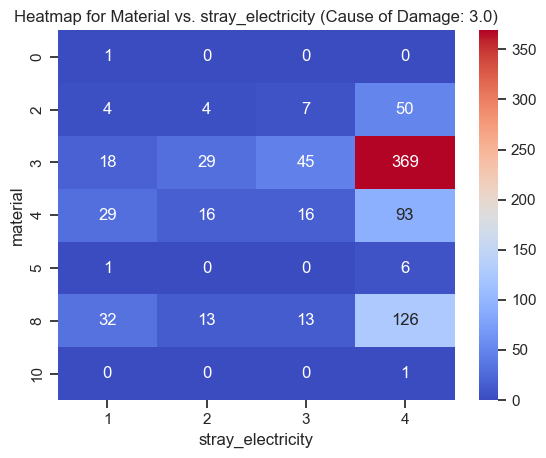

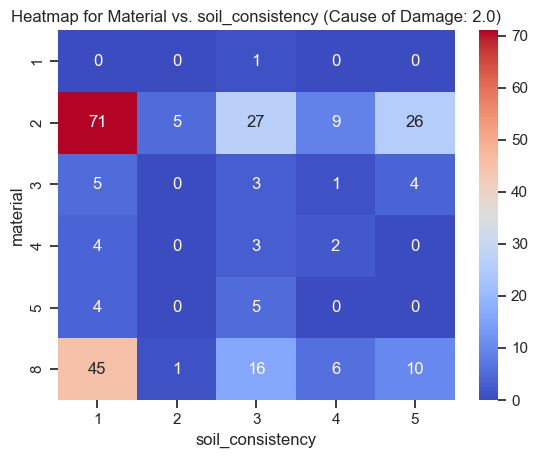

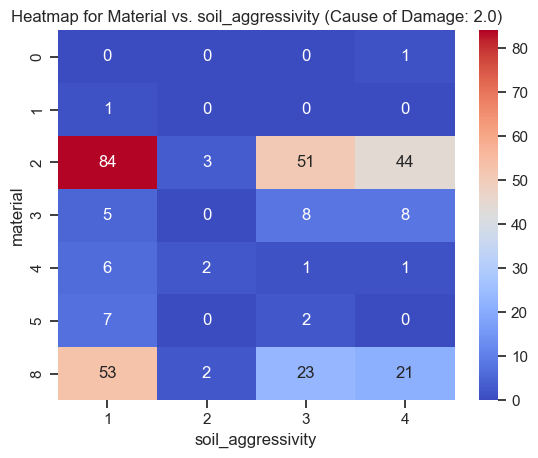

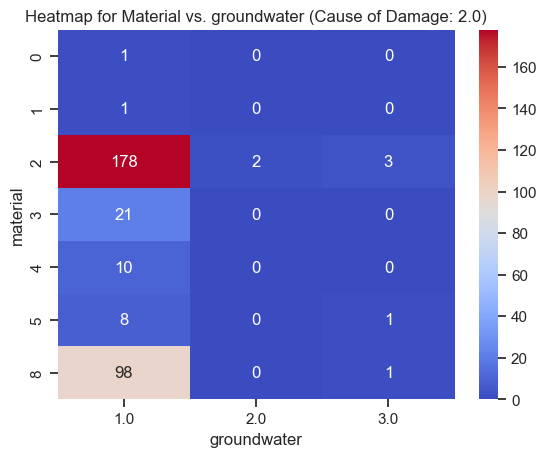

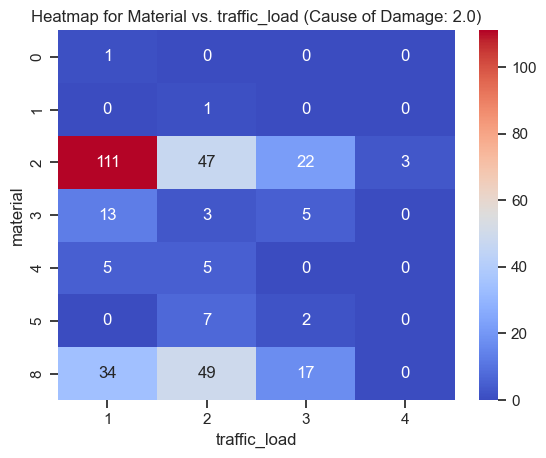

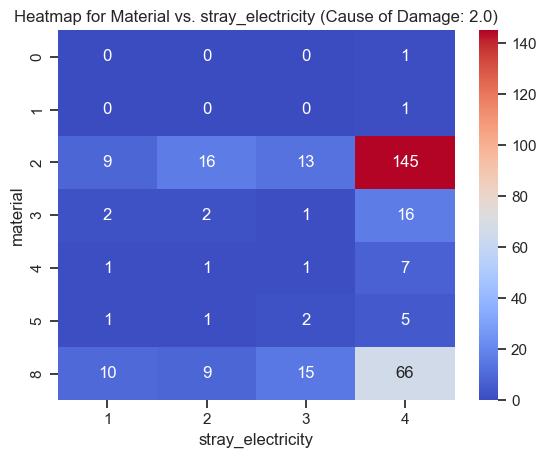

In [98]:
# Filter for cause_of_damage values 2 and 3
filtered_data = df_pipes_failures[df_pipes_failures['cause_of_damage'].isin([2, 3])]

# Define the categorical factors
categorical_factors = ['soil_consistency', 'soil_aggressivity', 'groundwater', 'traffic_load', 'stray_electricity']

# Plot separate heatmaps for each category of 'cause_of_damage' and each categorical factor
cause_of_damage_categories = filtered_data['cause_of_damage'].unique()

for category in cause_of_damage_categories:
    subset = filtered_data[filtered_data['cause_of_damage'] == category]
    
    # Check if the subset has non-empty data
    if not subset.empty:
        for factor in categorical_factors:
            # Exclude values 0 for the current factor
            subset_factor = subset[subset[factor] != 0]
            
            if not subset_factor.empty:
                contingency_subset = pd.crosstab(index=subset_factor['material'], columns=subset_factor[factor])
                
                sns.heatmap(contingency_subset, annot=True, cmap='coolwarm', fmt='d')
                plt.title(f'Heatmap for Material vs. {factor} (Cause of Damage: {category})')
                plt.show()
            else:
                print(f"No data for Cause of Damage: {category} and {factor}")
    else:
        print(f"No data for Cause of Damage: {category}")

#### Codes for soil_consistency: 1= very low cohesive, 2= low cohesive, 3= moderately cohesive, 4= highly cohesive, 5= very highly cohesive
#### Codes for soil_aggressivity: 1= Ia (low), 2= Ib (low), 3= II (moderately), 4= III (highly) 
#### Codes for groundwater: 1= above groundwater, 2= groundwater transition zone, 3= in groundwater
#### Codes for traffic_load: 1= none, 2= only passenger cars, 3= low (<100 trucks), 4= medium (up to 500 trucks), 5=  high (up to 1000 trucks)
#### Codes for stray_electricity: 1=  0 - 1 m, 2=  1 - 5 m, 3= 5 - 10 m, 4= more than 10 m

### Observation:  In summary, the current visualizations do not effectively highlight the relationship between the analyzed environmental factors and the causes of failures for specific pipe materials. For instance, failures attributed to soil movement should be influenced by factors such as unfavorable soil consistency, traffic loading, and groundwater. Previous analyses indicated that, for non-ductile materials like cast iron and polyethylene pipes, soil movement is the primary cause of failures. However, the presented visualizations do not reveal a clear correlation. For example, in the case of cast iron pipes, there appears to be a higher count of failures in pipes with favorable soil consistency compared to those with unfavorable soil consistency. Furthermore, failures attributed to corrosion should be influenced by factors such as groundwater, soil aggressiveness, and power supply cables. The analysis has confirmed that in ductile cast iron pipes and steel pipes, the majority of pipe failures occurred due to corrosion.  However, For instance, when analyzing soil aggressivity, it is observed that for steel pipes (where corrosion is the main cause), there is an even larger number of pipes in favorable aggressive soil (low aggressivity) compared to those in high aggressivity soil. The results regarding groundwater are not meaningful due to the very few pipes located in groundwater.

 

### Conclusion: Based on the observations, it seems that the current analysis may not be effectively capturing the relationship between environmental factors and causes of failures for specific pipe materials. Here are some suggestions to improve the analysis:
### Explore Interaction Effects: Investigate potential interaction effects between multiple environmental factors.
### Consider Multivariate Analysis: Explore multivariate analysis techniques, such as multivariate regression or machine learning models. These approaches can handle multiple variables simultaneously and may reveal more nuanced relationships.
### Statistical Testing: Perform statistical tests to quantify the significance of observed patterns. For categorical variables, i can use the chi-square test for independence to assess whether there is a significant association between the occurrence of pipe failures and each environmental factor. 
### Hypothesis Testing Summary:
### Null Hypothesis (H0): There is no association between the occurrence of pipe failures and each environmental factor ('soil_consistency', 'soil_aggressivity', 'groundwater', 'traffic_load', 'stray_electricity') for certain pipe materials.
### Observations:
### For Cast Iron Pipes:

#### No association found between the occurrence of pipe failures and 'soil_consistency'.
#### No association found between the occurrence of pipe failures and 'traffic_load'.
#### Note: Groundwater was excluded due to the limited number of pipes located in groundwater.

### For Ductile Cast Iron and Steel Pipes:

#### No association found between the occurrence of pipe failures and 'soil_aggressivity'.
#### No association found between the occurrence of pipe failures and 'stray_electricity'.
#### Note: Groundwater was excluded due to the limited number of pipes located in groundwater.

### Implications: The absence of a statistically significant association suggests that, for the specified pipe materials, the mentioned environmental factors may not be predictive of pipe failures.

##### Here are some additional possibilities for testing hypotheses: 

##### Hypothesis A: The combination of  unfavorable soil consistency and unfavorable traffic loading leads to occurrence of failures on cast iron pipes.

##### Hypothesis B: The combination of unfavorable soil aggressivity and unfavorable position of stray electricity leads to occurrence of failures on ductile cast iron and steel pipes.